# Previsão Sobre Clientes

Este notebook trata de um problema de predição em classificação binária. A variável target é Cliente e possui os valores Premium e Normal.

Este tipo de predição é importante para entender os seus clientes, potenciais dos mesmos e como tornar um cliente Normal em Premium para obter mais valor deles. Por exemplo, se eu noto que possuir linhas multiplas aumentam a chance de tornar o meu cliente premium, eu poderia oferecer pacotes que facilitem a opção.

As variáveis do dataset estão em inglês, porém é de fácil compreensão, não sendo feitas traduções das mesmas no trabalho.

Neste problema são usados dois datasets, um de treino com a variável target explícita e um de teste com a variável target a ser predita.
As variáveis dos datasets são:

- Cliente -> Variável Target, é binária e possui as opções de Premium e Normal.
- Gender -> Male e Female (gênero da pessoa, masculino ou feminino)
- SeniorCitizen -> 1 e 0 (Se é um cidadão idoso, 1 é Yes e 0 é No)
- Partner -> Yes e No (Se tem união estável com alguém)
- Dependents -> Yes e No (Se possui filhos ou dependentes)
- Tenure -> 0-72 (Tempo que a pessoa é cliente da operadora em meses)
- PhoneService -> Yes e No (Se possui serviço de telefone)
- MultipleLines -> Yes, No e No phone Service (Se possui multiplas linhas, no caso de nao ter serviço telefonico, nao possui)
- InternetService -> Yes e No (se possui serviço de internet)
- OnlineBackup, DeviceProtection, TechSupport, StreamingTV e StreamingMovies -> Yes, No, No internet service (se possui esses serviços atrrelados a internet)
- Contract -> 'Two year', 'One year', 'Month-to-month' (Tipo de contrato, a cada dois anos, um ano ou mês a mês)
- PaperlessBilling -> Yes e No (se o faturamento é sem papel)
- PaymentMethod -> 'Mailed check', 'Credit card (automatic)', 'Electronic check','Bank transfer (automatic)' (Tipo de pagamento adotado pelo cliente)

### Problemática:
Efetuar a previsão da variável **Clientes** em Normal ou Premium

## IMPORTANDO OS DATA SETS

In [1]:
import pandas as pd

dados_treino = pd.read_csv("treino.csv")
dados_treino.head()
dados_teste = pd.read_csv("teste.csv")
dados_teste.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,Yes,23,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Female,0,No,No,27,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
2,Male,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check
3,Female,0,No,No,48,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic)
4,Male,0,Yes,No,71,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check


## ANÁLISE EXPLORATÓRIA DE DADOS

**Vendo se possui dados faltantes nas variáveis do dataset de treino e de teste**

In [2]:
dados_treino.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Cliente             0
dtype: int64

In [3]:
dados_teste.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
dtype: int64

**Os datasets não possuem valores faltantes** 

**Entendendo o tipo de cada variável**

In [4]:
dados_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            2500 non-null   object
 1   SeniorCitizen     2500 non-null   int64 
 2   Partner           2500 non-null   object
 3   Dependents        2500 non-null   object
 4   tenure            2500 non-null   int64 
 5   PhoneService      2500 non-null   object
 6   MultipleLines     2500 non-null   object
 7   InternetService   2500 non-null   object
 8   OnlineSecurity    2500 non-null   object
 9   OnlineBackup      2500 non-null   object
 10  DeviceProtection  2500 non-null   object
 11  TechSupport       2500 non-null   object
 12  StreamingTV       2500 non-null   object
 13  StreamingMovies   2500 non-null   object
 14  Contract          2500 non-null   object
 15  PaperlessBilling  2500 non-null   object
 16  PaymentMethod     2500 non-null   object
 17  Cliente       

In [5]:
dados_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            2500 non-null   object
 1   SeniorCitizen     2500 non-null   int64 
 2   Partner           2500 non-null   object
 3   Dependents        2500 non-null   object
 4   tenure            2500 non-null   int64 
 5   PhoneService      2500 non-null   object
 6   MultipleLines     2500 non-null   object
 7   InternetService   2500 non-null   object
 8   OnlineSecurity    2500 non-null   object
 9   OnlineBackup      2500 non-null   object
 10  DeviceProtection  2500 non-null   object
 11  TechSupport       2500 non-null   object
 12  StreamingTV       2500 non-null   object
 13  StreamingMovies   2500 non-null   object
 14  Contract          2500 non-null   object
 15  PaperlessBilling  2500 non-null   object
 16  PaymentMethod     2500 non-null   object
dtypes: int64(2), o

### Transformando variável Target em 1 e 0 

Modelos de Machine Learning trabalham com lógicas matemáticas, portanto, em geral, trabalha-se com todas as variáveis como matemáticas, para isso, sera feita a seguinte modificação na variável target:
- Clientes mudará de Normal e Premium para 0 e 1

In [6]:
dados_treino["Cliente"] = dados_treino["Cliente"].map({"Normal":0,"Premium":1})

**Entendendo as respostas das variáveis:**

In [7]:
for i in dados_treino.columns:
    print(i)
    display(dados_treino[i].unique())
    print("="*40)
    

gender


array(['Female', 'Male'], dtype=object)

SeniorCitizen


array([0, 1], dtype=int64)

Partner


array(['No', 'Yes'], dtype=object)

Dependents


array(['No', 'Yes'], dtype=object)

tenure


array([20, 59, 68, 35,  1, 29, 17, 25, 58, 64,  2,  7, 53, 37, 11, 61, 26,
       44, 47, 30,  6,  8, 69, 24, 54, 60,  4, 12, 72, 65, 10, 32, 13, 62,
       19, 45, 15, 51, 23, 16, 18, 52, 39,  5, 57, 33, 22,  3, 71, 66, 70,
       21, 28, 31,  9, 34, 40, 56, 27, 46, 63, 41, 55, 14, 67, 38, 36, 50,
       43, 48, 49, 42], dtype=int64)

PhoneService


array(['Yes', 'No'], dtype=object)

MultipleLines


array(['No', 'Yes', 'No phone service'], dtype=object)

InternetService


array(['No', 'DSL', 'Fiber optic'], dtype=object)

OnlineSecurity


array(['No internet service', 'Yes', 'No'], dtype=object)

OnlineBackup


array(['No internet service', 'Yes', 'No'], dtype=object)

DeviceProtection


array(['No internet service', 'No', 'Yes'], dtype=object)

TechSupport


array(['No internet service', 'Yes', 'No'], dtype=object)

StreamingTV


array(['No internet service', 'No', 'Yes'], dtype=object)

StreamingMovies


array(['No internet service', 'No', 'Yes'], dtype=object)

Contract


array(['Two year', 'One year', 'Month-to-month'], dtype=object)

PaperlessBilling


array(['No', 'Yes'], dtype=object)

PaymentMethod


array(['Mailed check', 'Credit card (automatic)', 'Electronic check',
       'Bank transfer (automatic)'], dtype=object)

Cliente


array([0, 1], dtype=int64)

**Colinearidade entre variáveis**
Observa-se uma colinearidade entre as variáveis, toda vez que PhoneService for No, a variável MultipleLines será no phone service, que nada mais é do que o próprio no da variável.
O mesmo acontece para InternetService e as variáveis que possuem serviço atrelado a internet.
Colinearidade não é bom para modelos de Machine Learning porque podem enganar o modelo, levar a predições errôneas, considerar mais fortemente variáveis não influentes, etc.

Vamos remover as colinearidades com o intuito de melhorar o modelo

In [8]:
dados_treino[["PhoneService", "MultipleLines"]][dados_treino["PhoneService"]=="No"]

,PhoneService,MultipleLines
2,No,No phone service
12,No,No phone service
16,No,No phone service
26,No,No phone service
39,No,No phone service
...,...,...
2458,No,No phone service
2468,No,No phone service
2480,No,No phone service
2485,No,No phone service


In [9]:
dados_treino[["InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]][dados_treino["InternetService"]=="No"].value_counts()

InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies    
No               No internet service  No internet service  No internet service  No internet service  No internet service  No internet service    541
dtype: int64

In [10]:
a = dados_treino[["InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]][dados_treino["InternetService"]=="No"]
a[["OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]] = "No"
a.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,No,No,No,No,No,No,No
5,No,No,No,No,No,No,No
7,No,No,No,No,No,No,No
15,No,No,No,No,No,No,No
20,No,No,No,No,No,No,No


In [11]:
#b = dados_treino[["InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]][dados_treino["InternetService"]=="No"].apply(eliminando_colinearidade)
dados_treino.loc[dados_treino["InternetService"]=="No",["InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]] = "No"

#b[["InternetService","OnlineSecurity","OnlineBackup"]] = "No"
#b
display(dados_treino.loc[dados_treino["InternetService"]=="No",:].head())

dados_teste.loc[dados_teste["InternetService"]=="No",["InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]] = "No"
display(dados_teste)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cliente
0,Female,0,No,No,20,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,0
5,Male,0,Yes,Yes,29,Yes,No,No,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,0
7,Female,0,No,No,25,Yes,No,No,No,No,No,No,No,No,Two year,No,Credit card (automatic),0
15,Male,0,No,No,11,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,0
20,Female,0,Yes,Yes,47,Yes,No,No,No,No,No,No,No,No,Two year,No,Credit card (automatic),0


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,Yes,23,Yes,No,No,No,No,No,No,No,No,One year,No,Mailed check
1,Female,0,No,No,27,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
2,Male,0,No,No,2,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check
3,Female,0,No,No,48,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic)
4,Male,0,Yes,No,71,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Female,0,Yes,Yes,72,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
2496,Female,0,Yes,Yes,1,Yes,No,DSL,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
2497,Male,1,No,No,2,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
2498,Male,0,No,No,71,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Credit card (automatic)


In [12]:
dados_treino.loc[dados_treino["PhoneService"]=="No",["PhoneService", "MultipleLines"]] = "No"
display(dados_treino.loc[dados_treino["PhoneService"]=="No",["PhoneService", "MultipleLines"]])
dados_teste.loc[dados_teste["PhoneService"]=="No",["PhoneService", "MultipleLines"]] = "No"
display(dados_teste.loc[dados_teste["PhoneService"]=="No",["PhoneService", "MultipleLines"]])

,PhoneService,MultipleLines
2,No,No
12,No,No
16,No,No
26,No,No
39,No,No
...,...,...
2458,No,No
2468,No,No
2480,No,No
2485,No,No


,PhoneService,MultipleLines
7,No,No
18,No,No
21,No,No
33,No,No
35,No,No
...,...,...
2431,No,No
2452,No,No
2455,No,No
2457,No,No


**Revendo os dados após essas modificações**

In [13]:
for i in dados_teste.columns:
    print(i)
    display(dados_treino[i].unique())
    display(dados_teste[i].unique())
    print("="*40)
    

gender


array(['Female', 'Male'], dtype=object)

array(['Female', 'Male'], dtype=object)

SeniorCitizen


array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

Partner


array(['No', 'Yes'], dtype=object)

array(['Yes', 'No'], dtype=object)

Dependents


array(['No', 'Yes'], dtype=object)

array(['Yes', 'No'], dtype=object)

tenure


array([20, 59, 68, 35,  1, 29, 17, 25, 58, 64,  2,  7, 53, 37, 11, 61, 26,
       44, 47, 30,  6,  8, 69, 24, 54, 60,  4, 12, 72, 65, 10, 32, 13, 62,
       19, 45, 15, 51, 23, 16, 18, 52, 39,  5, 57, 33, 22,  3, 71, 66, 70,
       21, 28, 31,  9, 34, 40, 56, 27, 46, 63, 41, 55, 14, 67, 38, 36, 50,
       43, 48, 49, 42], dtype=int64)

array([23, 27,  2, 48, 71, 26, 18, 35, 10, 42, 62, 12, 55, 58,  7,  1,  5,
       67, 41, 66, 11,  6, 40,  8, 25, 39, 29, 51, 37,  9, 72, 22, 45,  3,
       43, 46, 16, 17, 56, 24,  4, 20, 63, 38, 60, 31, 21, 15, 57, 54, 61,
       47, 28, 53, 69, 44, 65, 13, 49, 14, 70, 64, 52, 50, 68, 33, 59, 32,
       34, 19, 36, 30], dtype=int64)

PhoneService


array(['Yes', 'No'], dtype=object)

array(['Yes', 'No'], dtype=object)

MultipleLines


array(['No', 'Yes'], dtype=object)

array(['No', 'Yes'], dtype=object)

InternetService


array(['No', 'DSL', 'Fiber optic'], dtype=object)

array(['No', 'DSL', 'Fiber optic'], dtype=object)

OnlineSecurity


array(['No', 'Yes'], dtype=object)

array(['No', 'Yes'], dtype=object)

OnlineBackup


array(['No', 'Yes'], dtype=object)

array(['No', 'Yes'], dtype=object)

DeviceProtection


array(['No', 'Yes'], dtype=object)

array(['No', 'Yes'], dtype=object)

TechSupport


array(['No', 'Yes'], dtype=object)

array(['No', 'Yes'], dtype=object)

StreamingTV


array(['No', 'Yes'], dtype=object)

array(['No', 'Yes'], dtype=object)

StreamingMovies


array(['No', 'Yes'], dtype=object)

array(['No', 'Yes'], dtype=object)

Contract


array(['Two year', 'One year', 'Month-to-month'], dtype=object)

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

PaperlessBilling


array(['No', 'Yes'], dtype=object)

array(['No', 'Yes'], dtype=object)

PaymentMethod


array(['Mailed check', 'Credit card (automatic)', 'Electronic check',
       'Bank transfer (automatic)'], dtype=object)

array(['Mailed check', 'Credit card (automatic)', 'Electronic check',
       'Bank transfer (automatic)'], dtype=object)

In [14]:
dados_treino

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cliente
0,Female,0,No,No,20,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,0
1,Female,0,Yes,Yes,59,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,No,Mailed check,1
2,Female,0,Yes,Yes,68,No,No,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),1
3,Female,0,No,Yes,35,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,1
4,Male,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Male,0,No,No,13,Yes,No,DSL,No,Yes,No,Yes,Yes,Yes,Month-to-month,No,Mailed check,0
2496,Male,0,No,No,24,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
2497,Male,0,Yes,No,56,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,One year,Yes,Electronic check,1
2498,Male,0,No,No,19,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),0


In [15]:
dados_teste["MultipleLines"].unique()

array(['No', 'Yes'], dtype=object)

### Exceto tenure, todas as variáveis são categóricas

Como comentamos, é necessário passar todas as variáveis para numéricas. Como já reduzimos o número de opções em diversas variáveis com a última transformação, excluindo o No phone service e o No internet service nas outras variáveis, possuímos agora diversas variáveis categóricas com poucas categorias, uma forma de torná-las numéricas, é separar a variável em uma variável para cada categoria que pertence a ela, e quando a categoria for a resposta da variável, a categoria nova criada sobre a respectiva classe recebe o valor de 1 e quando não for ela, recebe valor de 0.

A função que faz isso em python é o get_dummies.
Um dos argumentos da função get_dummies é ''drop_first'', ele serve para remover colinearidade, porque se temos duas variáveis e uma é 0, a outra obrigatoriamente é sim, então nao preciso informar ela.

Com esse raciocínio

- Vamos fazer get_dummies delas
- Depois avaliamos o tenure de duas formas : 1. como categorias
                                             2. como numerica

In [16]:
dados_treino.drop("tenure", axis = 1).columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Cliente'],
      dtype='object')

In [17]:
pd.get_dummies(dados_treino["TechSupport"],prefix = "Tech",drop_first = True)

,Tech_Yes
0,0
1,1
2,1
3,0
4,0
...,...
2495,1
2496,0
2497,0
2498,0


In [18]:
dados_treino.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Cliente
0,Female,0,No,No,20,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,0
1,Female,0,Yes,Yes,59,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,One year,No,Mailed check,1
2,Female,0,Yes,Yes,68,No,No,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),1
3,Female,0,No,Yes,35,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,No,Mailed check,1
4,Male,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Electronic check,0


In [19]:
dados_treino.drop(["tenure", "SeniorCitizen","Cliente"], axis = 1).columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [20]:
dados_treino = pd.get_dummies(data = dados_treino, drop_first = True, columns = dados_treino.drop(["tenure", "SeniorCitizen","Cliente"], axis = 1).columns)
dados_teste = pd.get_dummies(data = dados_teste, drop_first = True, columns = dados_teste.drop(["tenure", "SeniorCitizen"], axis = 1).columns)

In [21]:
dados_treino

,SeniorCitizen,tenure,Cliente,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,20,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,0,59,1,0,1,1,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1
2,0,68,1,0,1,1,0,0,0,0,...,1,1,1,1,0,1,0,1,0,0
3,0,35,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,13,0,1,0,0,1,0,0,0,...,0,1,1,1,0,0,0,0,0,1
2496,0,24,1,1,0,0,1,0,1,0,...,0,0,1,1,0,0,1,0,1,0
2497,0,56,1,1,1,0,1,1,1,0,...,0,0,1,1,1,0,1,0,1,0
2498,0,19,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [22]:
dados_teste

,SeniorCitizen,tenure,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,23,0,1,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,27,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,0,2,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,48,0,0,0,1,0,1,0,1,...,1,1,1,1,0,1,1,1,0,0
4,0,71,1,1,0,1,0,1,0,0,...,1,1,1,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,72,0,1,1,1,1,0,0,1,...,1,1,1,1,0,1,0,1,0,0
2496,0,1,0,1,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2497,1,2,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2498,0,71,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,1,1,0,0


**Agora vamos nos voltar a variável tenure**

A variável tenure é numérica, porém está em uma escala de 1 a 72, para alguns algoritmos isso é ruim, porque interpreta a ordem do valor numérica com maior importância, por exemplo o KNN que considera vizinhos próximos, a distância de 2 no tenure pode ser maior do que a mudança binaria em qualquer uma das outras variáveis que estão entre 0 e 1, porém sabemos que isso não é algo real.

Vamos entender a variável tenure e pensar em possíveis transformações sobre ela para evitar esses problemas

In [23]:
dados_treino["tenure"].describe()

count    2500.000000
mean       32.240800
std        24.474771
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [24]:
dados_teste["tenure"].describe()

count    2500.000000
mean       32.596400
std        24.393973
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

**Possíveis Transformações**

- Classificação utilizando quartis ou intervalos representativos
- Padronização/Normalização numérica

Vamos entender como isso tudo pode ser feito.

In [25]:
tenure_treino = dados_treino["tenure"]
tenure_treino.quantile(q = 0.75)
tenure_teste = dados_teste["tenure"]
tenure_teste.quantile(q = 0.75)

55.0

In [26]:
# Contando o numero de Cliente Normal e Cliente Premium por Tenure

pd.set_option('display.max_rows', len(dados_treino.groupby(["Cliente"])["tenure"].value_counts()))
dados = pd.DataFrame()

dados["Normal"] = dados_treino.groupby(["Cliente"])["tenure"].value_counts()[0]
dados["Premium"] = dados_treino.groupby(["Cliente"])["tenure"].value_counts()[1]
dados.head()

,Normal,Premium
tenure,,
1,223,NaN
2,97,NaN
3,74,NaN
4,67,NaN
8,44,NaN


In [27]:
# Proporção de cliente Normal e Premium por tenure

dados["Prop_Normal"] = dados.iloc[:,0]/dados.iloc[:,0:2].sum(axis = 1)
dados["Prop_Premium"] = dados.iloc[:,1]/dados.iloc[:,0:2].sum(axis = 1)
dados.sort_index()

,Normal,Premium,Prop_Normal,Prop_Premium
tenure,,,,
1,223,NaN,1.000000,NaN
2,97,NaN,1.000000,NaN
3,74,NaN,1.000000,NaN
4,67,NaN,1.000000,NaN
5,42,NaN,1.000000,NaN
6,31,NaN,1.000000,NaN
7,40,NaN,1.000000,NaN
8,44,NaN,1.000000,NaN
9,40,NaN,1.000000,NaN


**Escolha para Tenure**

Este notebook utilizará tenure como variável de classificação, porém é deixada uma possível normalização dividindo por 72

Para a escolha das categorias, foi visto as proporções por tenure e escolhido as possíveis classes.
Pontos a se notar:
1. Até 13 meses nenhum cliente é premium no dado de treino, seria isso uma regra ou acaso? O que muda para com 14 meses eu ter cliente premium sendo que representa apenas um mês.
2. Existem meses com tenure discrepantes de outros e que seria difícil encaixar em uma categoria baixa ou acima, para isso deve-se criar uma leve aleatorização nas classes.


In [28]:
#NUMERICA

#def normalizando(x):
#    return x/72
#    
#dados_treino["tenure"].apply(normalizando)
#dados_treino.loc[:,"tenure"] = dados["tenure"].apply(normalizando)

In [29]:
# TRANSFORMANDO TENURE EM CATEGORICA
def classificando(x):
    global tenure
    if x < 17:
        return "0-16"
    elif x < 30:
        return "17-29"
    elif x < 57:
        return "30-56"
    else:
        return ">56"

tenure_treino.apply(classificando)

0       17-29
1         >56
2         >56
3       30-56
4        0-16
        ...  
2495     0-16
2496    17-29
2497    30-56
2498    17-29
2499      >56
Name: tenure, Length: 2500, dtype: object

**As Classes foram:**
- <17 porque assim garanto a entrada de pelo menos uma pequena proporção de Premiuns que garantam o modelo não considerar uma regra menor que 13 ser Normal
- os outros cortes foram feitos analisando as proporções e pensando na melhor separação

In [30]:
dados_treino.loc[:,"tenure"] = tenure_treino.apply(classificando)
dados_treino

,SeniorCitizen,tenure,Cliente,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,17-29,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,0,>56,1,0,1,1,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1
2,0,>56,1,0,1,1,0,0,0,0,...,1,1,1,1,0,1,0,1,0,0
3,0,30-56,1,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0-16,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,0-16,0,1,0,0,1,0,0,0,...,0,1,1,1,0,0,0,0,0,1
2496,0,17-29,1,1,0,0,1,0,1,0,...,0,0,1,1,0,0,1,0,1,0
2497,0,30-56,1,1,1,0,1,1,1,0,...,0,0,1,1,1,0,1,0,1,0
2498,0,17-29,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [31]:
dados_teste.loc[:,"tenure"] = tenure_teste.apply(classificando)
dados_teste

,SeniorCitizen,tenure,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,17-29,0,1,1,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,17-29,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
2,0,0-16,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,30-56,0,0,0,1,0,1,0,1,...,1,1,1,1,0,1,1,1,0,0
4,0,>56,1,1,0,1,0,1,0,0,...,1,1,1,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,>56,0,1,1,1,1,0,0,1,...,1,1,1,1,0,1,0,1,0,0
2496,0,0-16,0,1,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2497,1,0-16,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2498,0,>56,1,0,0,1,0,0,1,0,...,0,0,0,0,0,1,1,1,0,0


**transformando as classes de tenure em numérica**

In [32]:
dados_treino = pd.get_dummies(data = dados_treino, drop_first = True, columns = ["tenure"])
dados_treino

,SeniorCitizen,Cliente,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_17-29,tenure_30-56,tenure_>56
0,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
1,0,1,0,1,1,1,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
2,0,1,0,1,1,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
3,0,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2496,0,1,1,0,0,1,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
2497,0,1,1,1,0,1,1,1,0,1,...,1,1,0,1,0,1,0,0,1,0
2498,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [33]:
dados_teste = pd.get_dummies(data = dados_teste, drop_first = True, columns = ["tenure"])
dados_teste

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_17-29,tenure_30-56,tenure_>56
0,0,0,1,1,1,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
1,0,0,0,0,1,0,0,0,1,1,...,0,0,0,1,0,0,1,1,0,0
2,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,1,0,1,0,...,1,0,1,1,1,0,0,0,1,0
4,0,1,1,0,1,0,1,0,0,1,...,1,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,0,1,1,1,1,0,0,1,1,...,1,0,1,0,1,0,0,0,0,1
2496,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2497,1,1,0,0,1,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0
2498,0,1,0,0,1,0,0,1,0,0,...,0,0,1,1,1,0,0,0,0,1


**Até aqui todas as transformações dos dados de treino foram feitas nos dados de teste, porém agora começaremos a entender algumas outras relações entre Clientes e as outras variáveis e depois a construir os modelos de machine learning e testar, para isso utilizaremos apenas o modelo de treino e só no final utilizaremos o modelo escolhido em cima dos dados de teste**

**EDA dos dados**

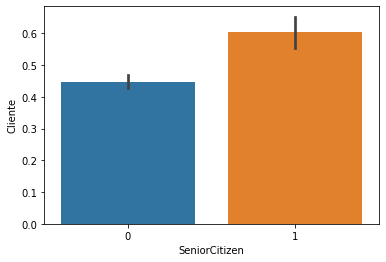

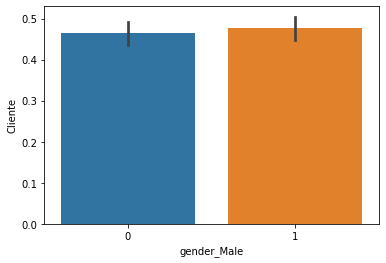

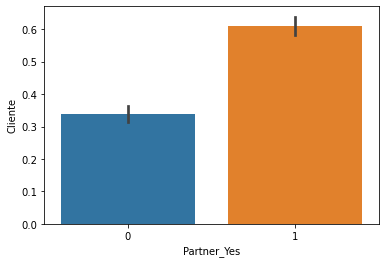

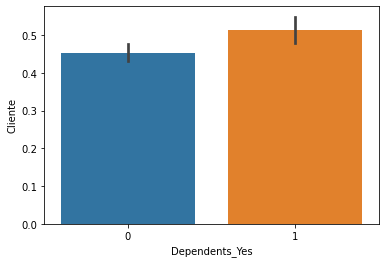

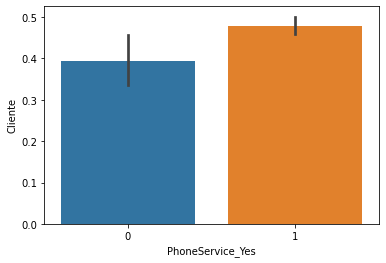

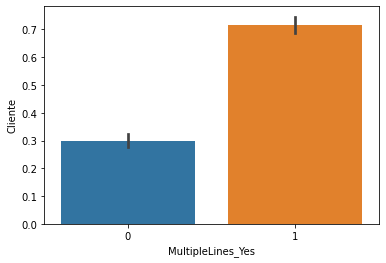

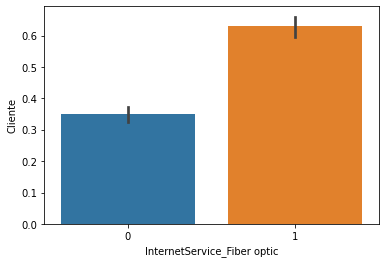

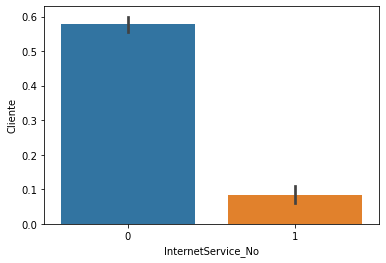

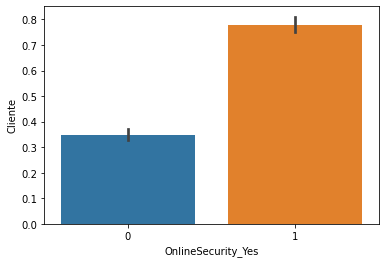

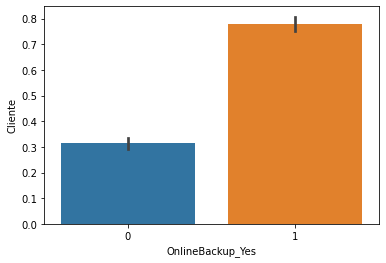

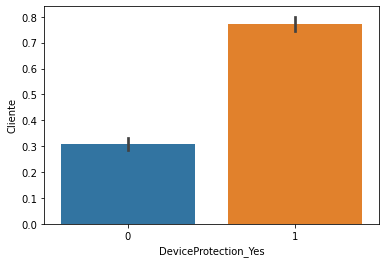

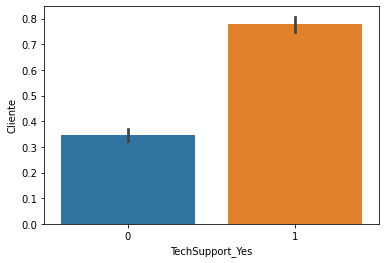

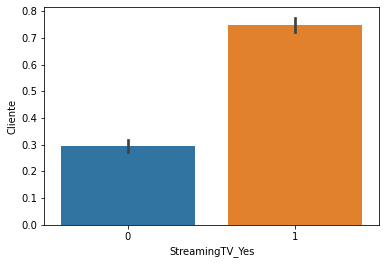

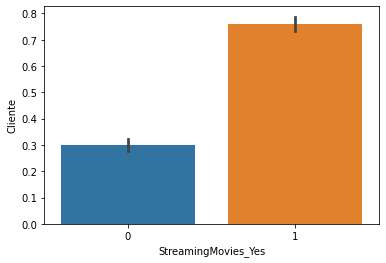

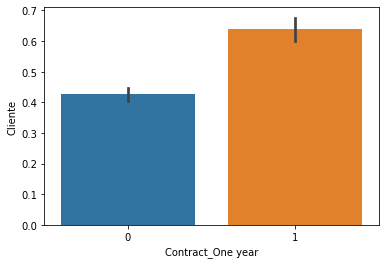

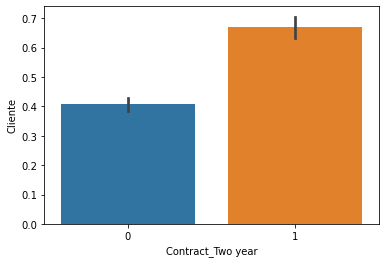

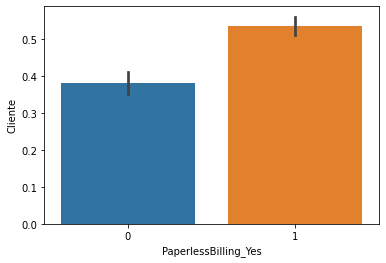

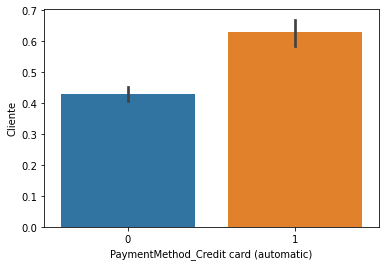

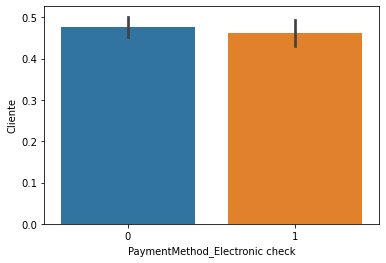

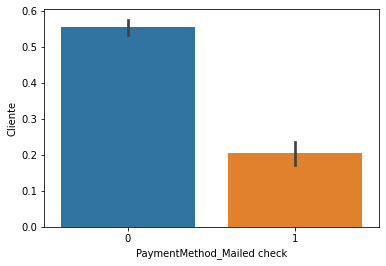

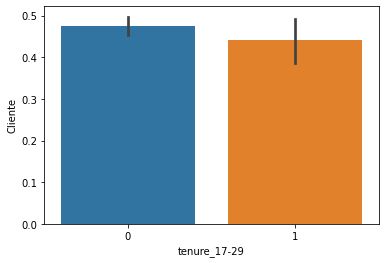

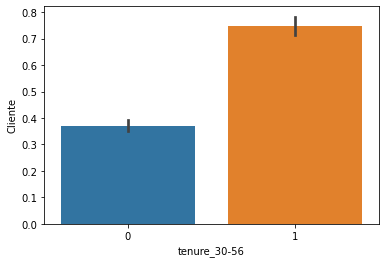

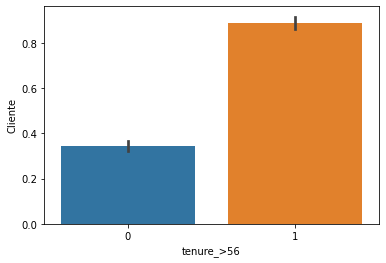

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in dados_treino.drop("Cliente", axis = 1):
    sns.barplot(x = i, y = dados_treino["Cliente"], data = dados_treino)
    plt.show()
    

In [35]:
#plt.figure(figsize = (10,10))
dados_treino.corr().round(2)


,SeniorCitizen,Cliente,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_17-29,tenure_30-56,tenure_>56
SeniorCitizen,1.00,0.11,-0.00,0.03,-0.20,0.01,0.13,0.24,-0.18,-0.03,...,0.10,-0.03,-0.13,0.16,-0.04,0.19,-0.16,0.02,0.01,0.00
Cliente,0.11,1.00,0.01,0.27,0.06,0.05,0.41,0.28,-0.41,0.39,...,0.45,0.17,0.22,0.15,0.16,-0.01,-0.30,-0.02,0.33,0.46
gender_Male,-0.00,0.01,1.00,-0.01,0.03,-0.01,-0.00,-0.03,-0.03,0.00,...,-0.03,0.00,-0.01,0.00,-0.01,0.01,0.01,0.04,0.02,-0.00
Partner_Yes,0.03,0.27,-0.01,1.00,0.48,0.02,0.13,-0.01,0.03,0.13,...,0.10,0.09,0.26,-0.03,0.08,-0.08,-0.11,-0.03,0.06,0.31
Dependents_Yes,-0.20,0.06,0.03,0.48,1.00,0.01,-0.02,-0.16,0.14,0.09,...,-0.04,0.09,0.19,-0.11,0.07,-0.15,0.05,-0.01,0.05,0.12
PhoneService_Yes,0.01,0.05,-0.01,0.02,0.01,1.00,0.27,0.28,0.17,-0.10,...,-0.00,-0.00,-0.00,0.02,-0.00,0.02,-0.04,-0.02,0.03,-0.00
MultipleLines_Yes,0.13,0.41,-0.00,0.13,-0.02,0.27,1.00,0.36,-0.21,0.12,...,0.27,-0.02,0.10,0.16,0.07,0.09,-0.24,-0.03,0.09,0.25
InternetService_Fiber optic,0.24,0.28,-0.03,-0.01,-0.16,0.28,0.36,1.00,-0.46,-0.01,...,0.32,-0.09,-0.22,0.33,-0.02,0.33,-0.31,-0.01,0.02,-0.01
InternetService_No,-0.18,-0.41,-0.03,0.03,0.14,0.17,-0.21,-0.46,1.00,-0.33,...,-0.40,0.07,0.20,-0.32,0.00,-0.27,0.29,0.03,0.01,-0.04
OnlineSecurity_Yes,-0.03,0.39,0.00,0.13,0.09,-0.10,0.12,-0.01,-0.33,1.00,...,0.19,0.09,0.19,-0.01,0.10,-0.08,-0.07,-0.03,0.05,0.27


**Pontos interessantes**

Algumas variáveis parecem não influenciar muito como o gênero da pessoa.
1. Algumas demonstram forte relação como no caso de tenure_>56
2. Outras possuem uma relação que pode estar camuflada, como no caso de PhoneService_yes que parece influenciar muito pouco, porém ela auxilia em multipleLines que possui forte relação com a variável Target.
3. O mesmo vale para os tenures, o de 17-29 parece não ter muita relação com a variável target, porém na dummyficação, foi removida a primeira por conta de colinearidade, e como vimos ela tem forte relação com a variável target, já que a proproção é muito baixa em <17, pensar em remover a variável de 17-29 é o mesmo que tornar a variável de <17 e entre 17 e 29 como uma só que seria a resposta pro caso das outras classes serem negativas.

### Análises Descritivas
**Observações**
- Pessoas que possuem mais de uma linha teleônica tem potencial muito maior de ser um cliente premium
- Pessoas que contratam internet possuem muito mais potencial de se tornar premium
- Das pessoas que contratam internet, as que contratam outros tipos de serviços são muito mais propensos a serem clientes Premiuns
- Pessoas com maior tenure tendem a se tornar clientes premiuns.

Dessas observações, algumas medidas interessantes que podem ser adotadas pela empresa são:
- facilitar e investir em planos familiares para que as pessoas adquiram linhas multiplas;
- criar formas de retenção do cliente através de incentivo a fidelidade principalmente no primeiro ano, já que os clientes tem mais chance de virar premium a medida que o tempo passa; 
- Oferecer pacotes de internet com todo o suporte e plano completo de acesso a serviços de forma conjunta


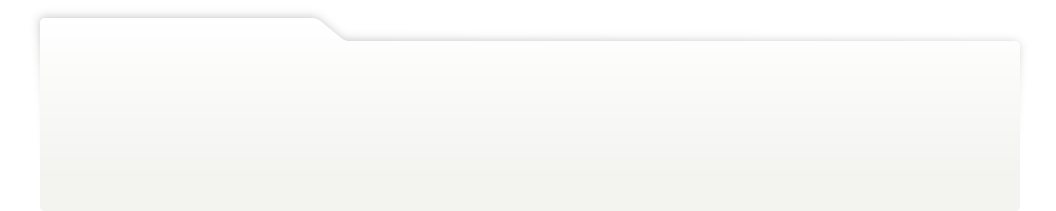
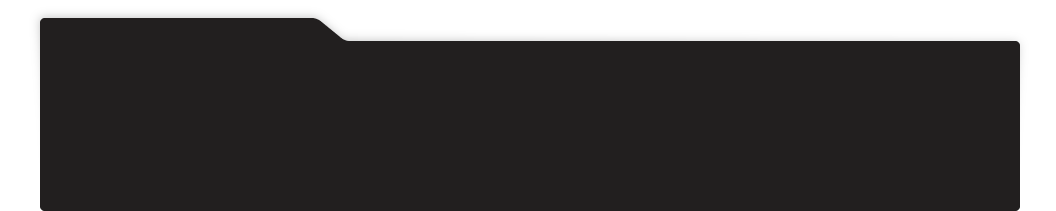
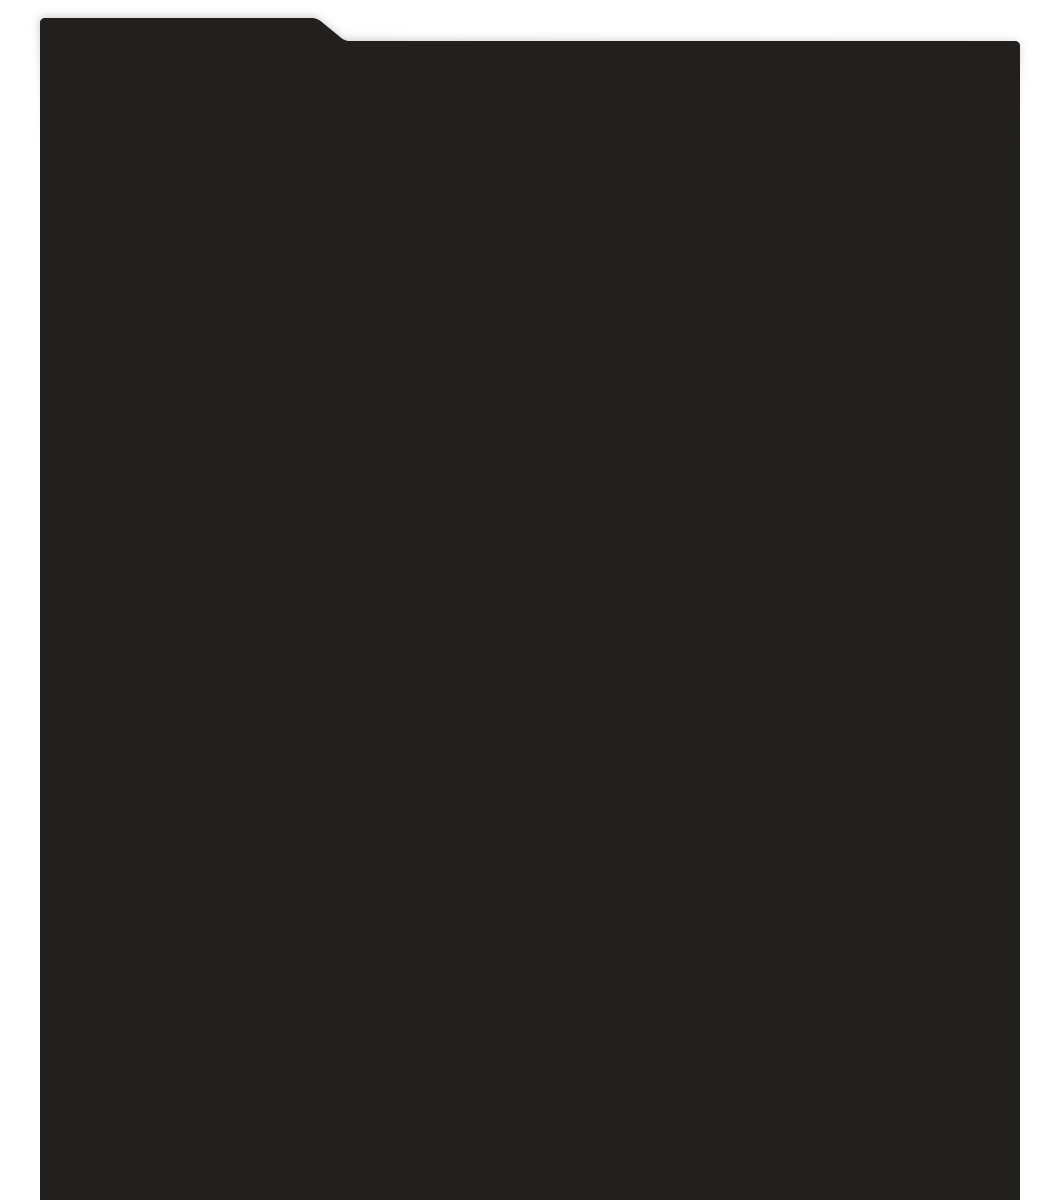
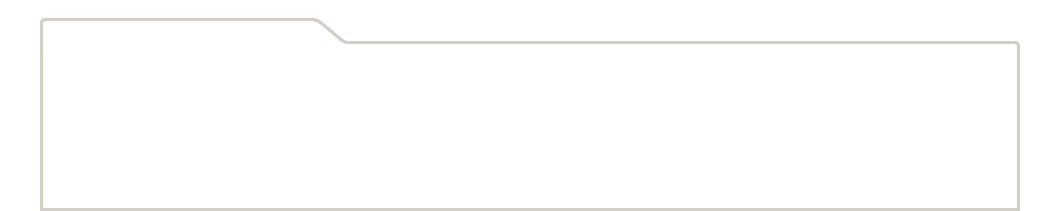
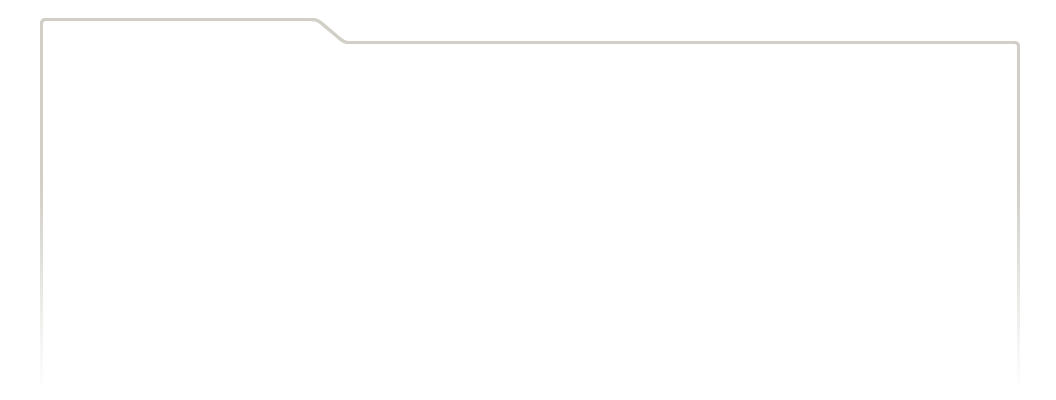
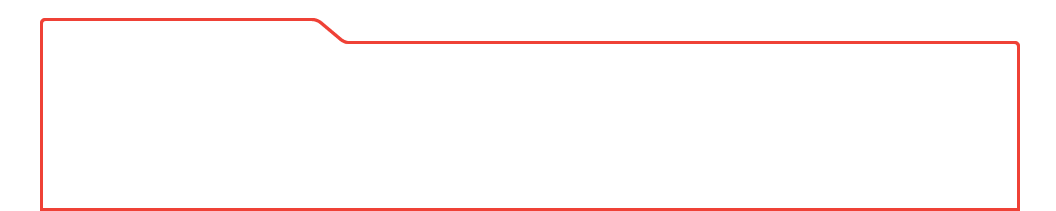
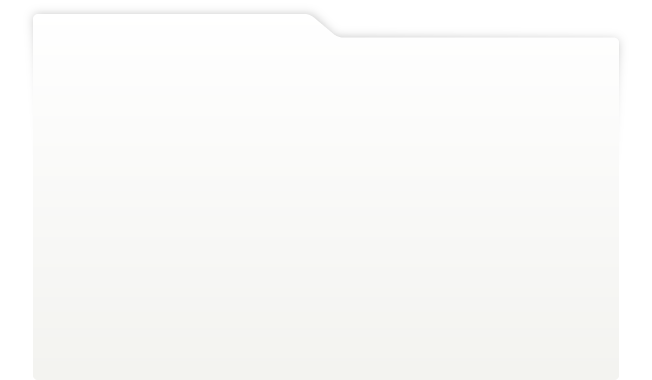
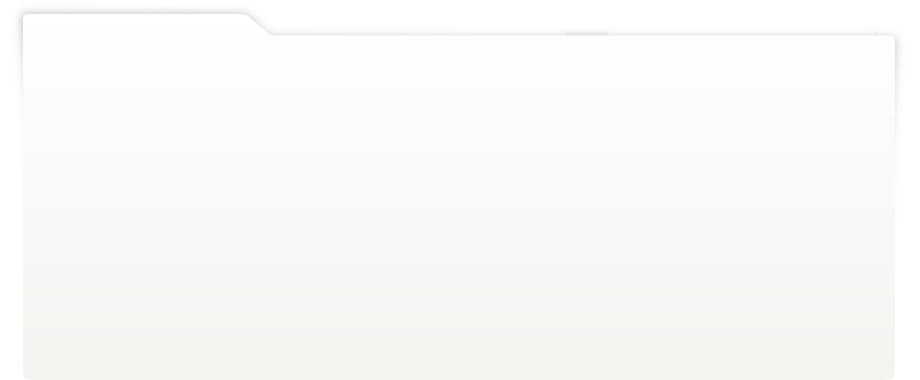
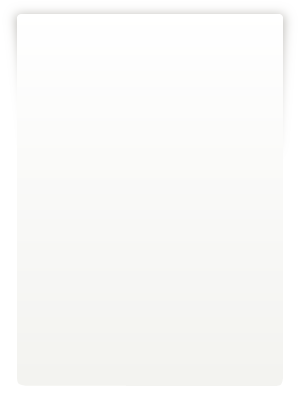
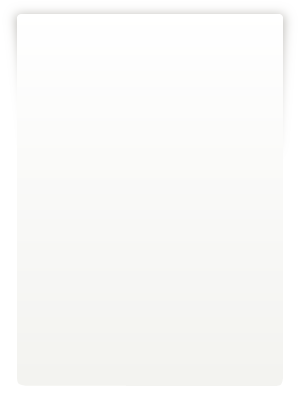
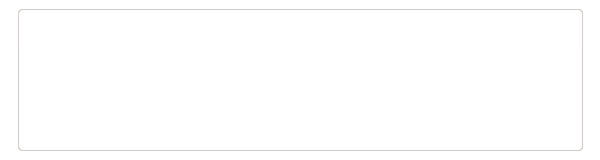
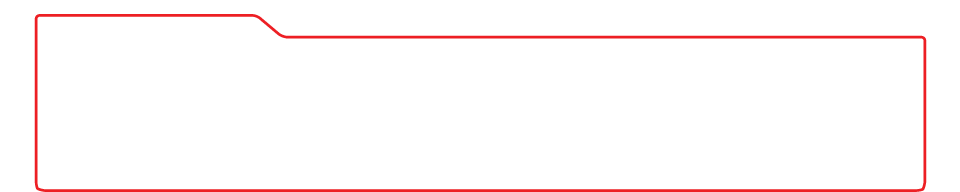
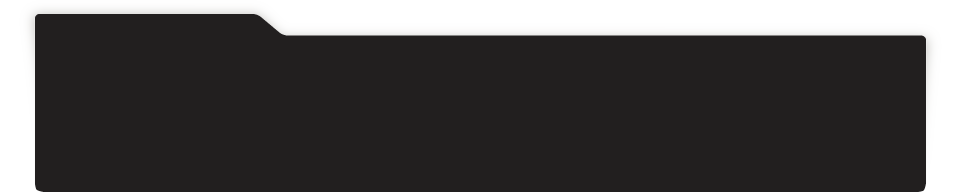
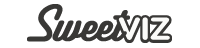
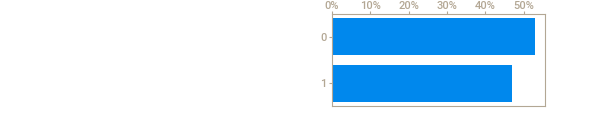
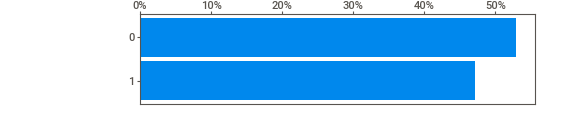
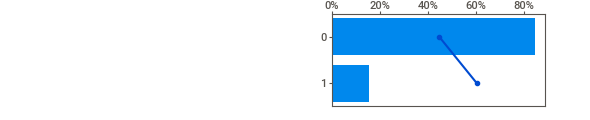
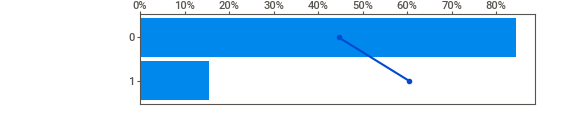
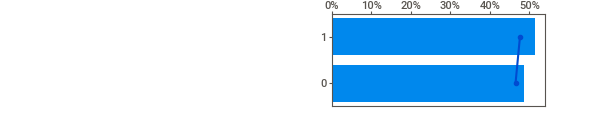
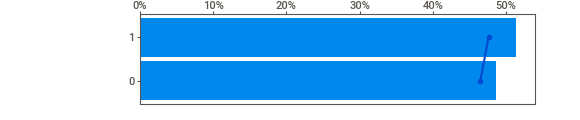
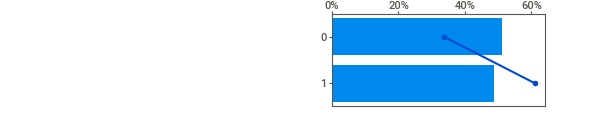
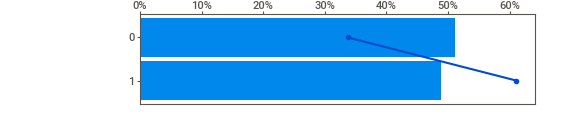
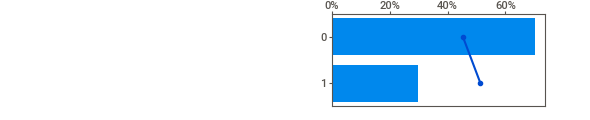
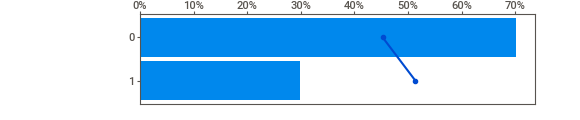
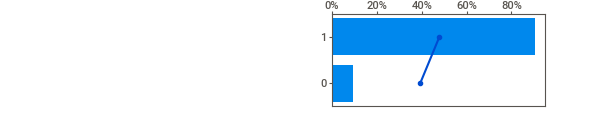
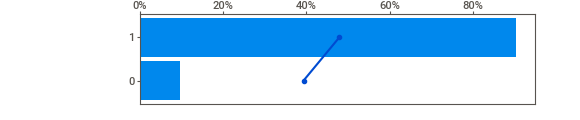
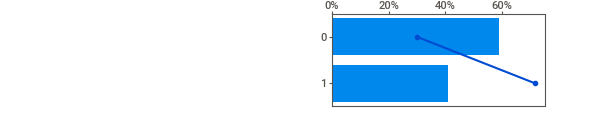
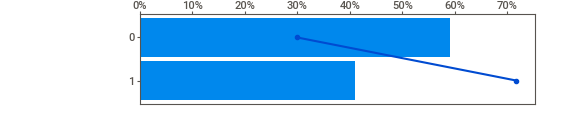
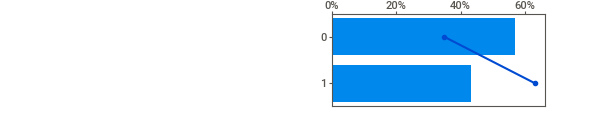
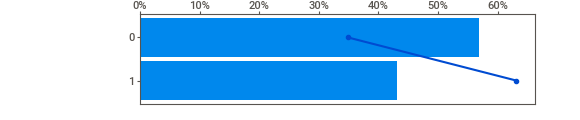
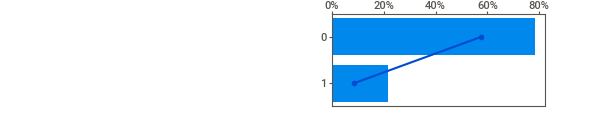
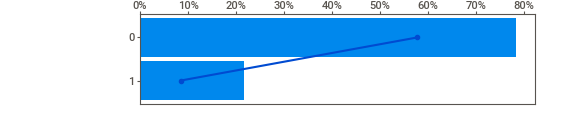
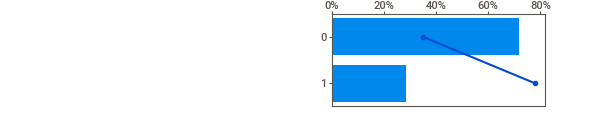
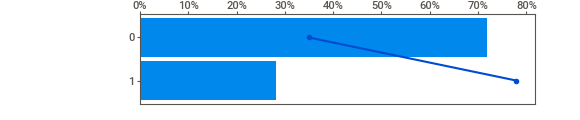
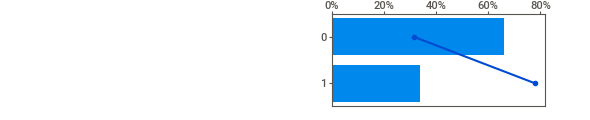
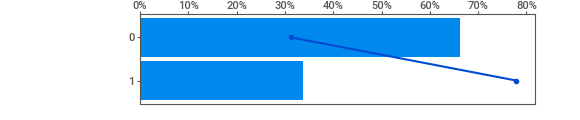
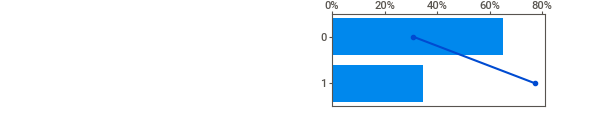
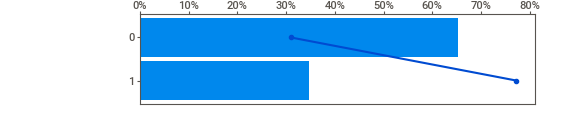
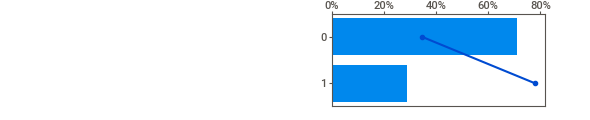
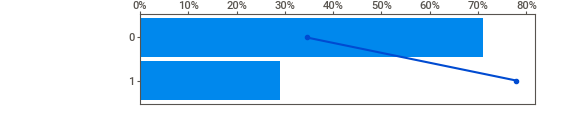
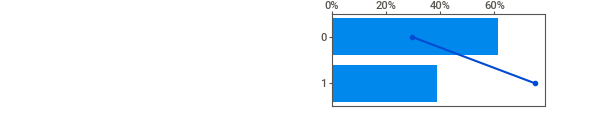
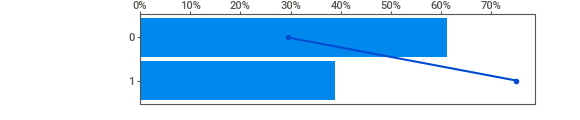
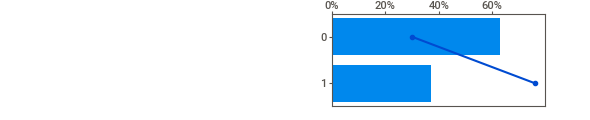
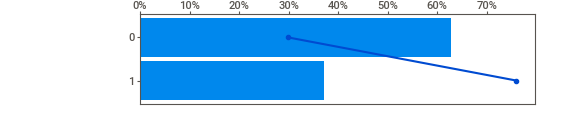
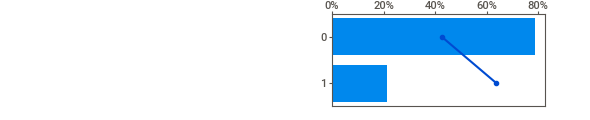
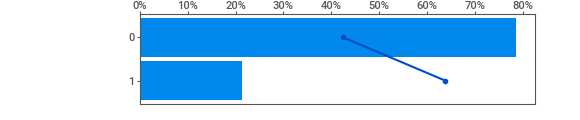
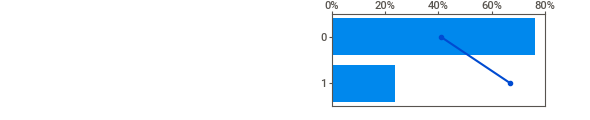
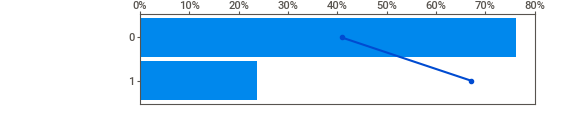
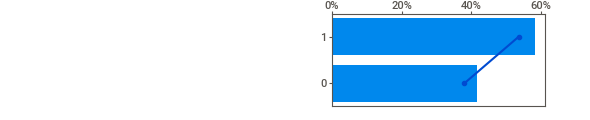
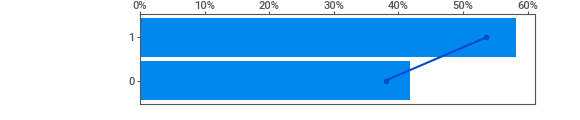
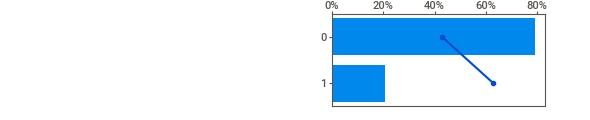
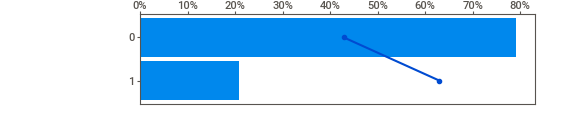
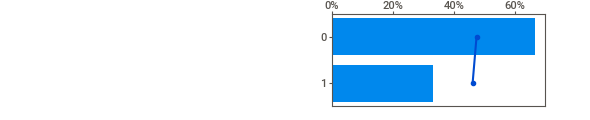
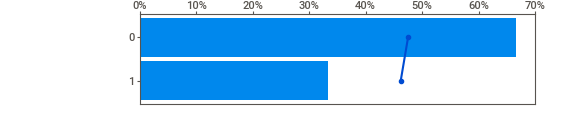
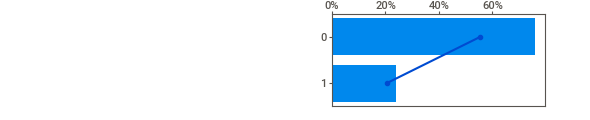
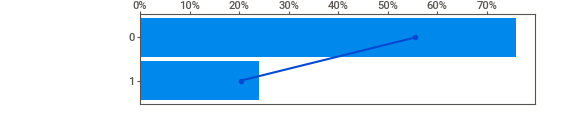
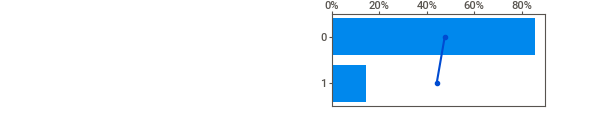
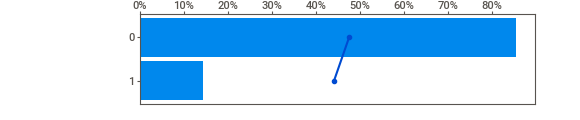
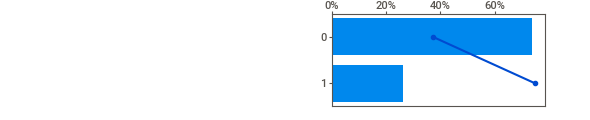
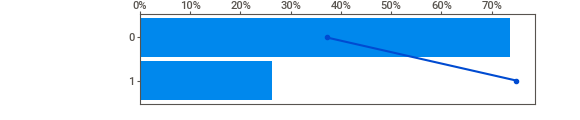
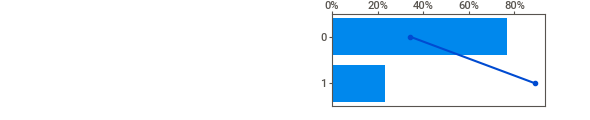
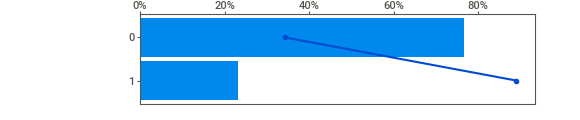
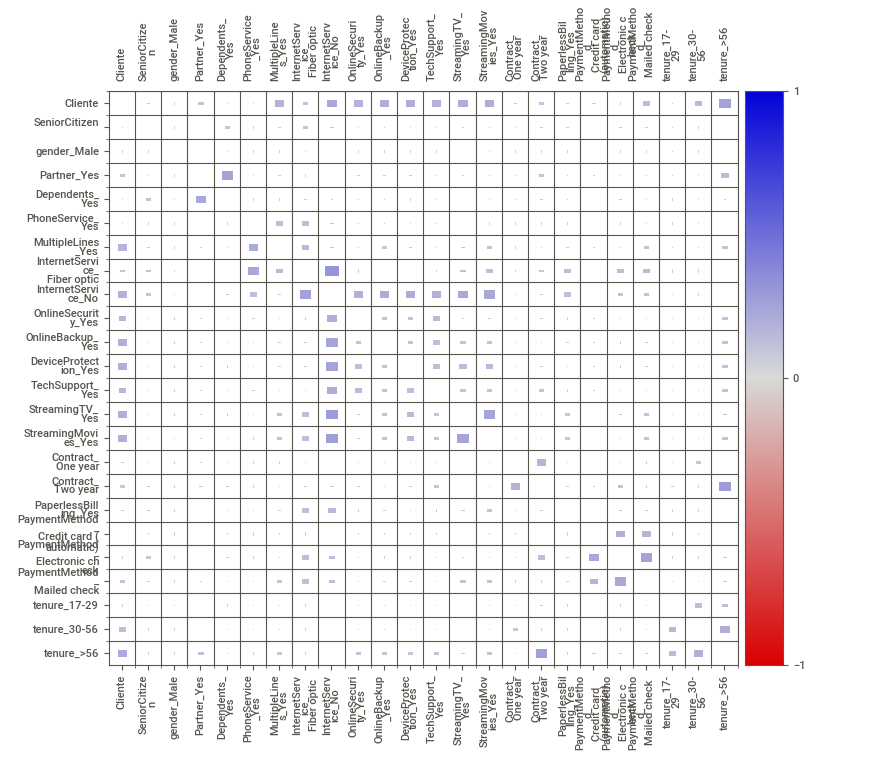
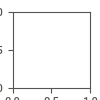

In [36]:
import sweetviz as sv
eda = sv.analyze(source = dados_treino, target_feat = "Cliente")
eda.show_notebook()

# MACHINE LEARNING

Vamos avaliar o conjunto de treino, só no final fazemos para teste

Importaremos já todas as métricas e modelos que utilizaremos no decorrer do notebook

In [37]:
# MODELOS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier



# MÉTRICAS
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score


# TUNAGEM DE MODELOS
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier

# EVITAR VARIAÇÕES DO MODELO DE ACORDO COM A AMOSTRA PARA TESTE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#from pycaret.classification import *



import numpy as np


In [38]:
dados_treino.drop("Cliente", axis = 1)

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_17-29,tenure_30-56,tenure_>56
0,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
1,0,0,1,1,1,1,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1
2,0,0,1,1,0,0,0,0,0,1,...,1,0,1,0,1,0,0,0,0,1
3,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,1,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
2496,0,1,0,0,1,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0
2497,0,1,1,0,1,1,1,0,1,0,...,1,1,0,1,0,1,0,0,1,0
2498,0,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [39]:
dados_treino

,SeniorCitizen,Cliente,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_17-29,tenure_30-56,tenure_>56
0,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
1,0,1,0,1,1,1,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
2,0,1,0,1,1,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
3,0,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2496,0,1,1,0,0,1,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
2497,0,1,1,1,0,1,1,1,0,1,...,1,1,0,1,0,1,0,0,1,0
2498,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [40]:
dados_teste

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_17-29,tenure_30-56,tenure_>56
0,0,0,1,1,1,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
1,0,0,0,0,1,0,0,0,1,1,...,0,0,0,1,0,0,1,1,0,0
2,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,1,0,1,0,...,1,0,1,1,1,0,0,0,1,0
4,0,1,1,0,1,0,1,0,0,1,...,1,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,0,1,1,1,1,0,0,1,1,...,1,0,1,0,1,0,0,0,0,1
2496,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2497,1,1,0,0,1,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0
2498,0,1,0,0,1,0,0,1,0,0,...,0,0,1,1,1,0,0,0,0,1


# HOLD OUT


Faça repetições da técnica Holdout, variando a distribuição de quem vai para amostra de teste e de treinamento. Guarde os resultados das métricas para cada repetição e no final, calcule sua média para obter um valor mais estável para as métricas.

A vantagem deste método é poder avaliar overfitting em números, já que você separa os dados de treino (agora me referirei a apenas dados) em treino e teste e pode testar seu modelo em ambos, treino e teste e avaliar o seu overfitting.

Alguns outros métodos que faremos mais a frente, tendem a dar a resposta com um modelo reduzindo esse overfitting, mas não da a medida que temos dele

In [71]:
def Hold_out_repetido(modelo, proporcao = 0.3, repeticoes = 50, x = dados_treino.drop("Cliente", axis = 1)):
    # MÉTRICAS
    f1_treino = []
    f1_teste = []
    acc_treino = []
    acc_teste = []
    bal_acc_treino = []
    bal_acc_teste = []
    precision_treino = []
    precision_teste = []
    recall_treino = []
    recall_teste = []
    
    # VARIAVEIS AUXILIARES E TARGET
    
    y = dados_treino["Cliente"]
    
    for i in range(repeticoes):
        # SEPARAÇÃO EM TESTE E TREINO E CRIAÇÃO DO MODELO
        x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = proporcao)
        mod = modelo
        mod.fit(x_treino, y_treino)
        # PREDIÇÃO DE TREINO E TESTE
        pred_treino = mod.predict(x_treino)
        pred_teste = mod.predict(x_teste)
        
        # CALCULO DAS METRICAS
        f1_treino.append(f1_score(y_treino, pred_treino))
        f1_teste.append(f1_score(y_teste, pred_teste))
        acc_treino.append(accuracy_score(y_treino, pred_treino))
        acc_teste.append(accuracy_score(y_teste, pred_teste))
        bal_acc_treino.append(balanced_accuracy_score(y_treino, pred_treino))
        bal_acc_teste.append(balanced_accuracy_score(y_teste, pred_teste))
        precision_treino.append(precision_score(y_treino, pred_treino))
        precision_teste.append(precision_score(y_teste, pred_teste))
        recall_treino.append(recall_score(y_treino, pred_treino))
        recall_teste.append(recall_score(y_teste, pred_teste))
        
    # MEDIA DAS METRICAS    
    res_treino_f1 = np.array(f1_treino).mean()
    res_teste_f1 = np.array(f1_teste).mean()
    res_treino_acc = np.array(acc_treino).mean()
    res_teste_acc = np.array(acc_teste).mean()
    res_treino_bal = np.array(bal_acc_treino).mean()
    res_teste_bal = np.array(bal_acc_teste).mean()
    res_treino_pre = np.array(precision_treino).mean()
    res_teste_pre = np.array(precision_teste).mean()
    res_treino_recall = np.array(recall_treino).mean()
    res_teste_recall = np.array(recall_teste).mean()
    
    
    #print(f"f1-score TREINO: {res_treino_f1}")
    #print(f"f1_score TESTE: {res_teste_f1}")
    #print(f"Accuracia TREINO: {res_treino_acc}")
    #print(f"Accuracia TESTE: {res_teste_acc}")
    #print(f'Balanced Accuracy TREINO: {res_treino_bal}')
    #print(f'Balanced Accuracy TESTE: {res_teste_bal}')
    #print(f'Precisão TREINO: {res_treino_pre}')
    #print(f'Precisão TESTE: {res_teste_pre}')
    #print(f'Sensibilidade TREINO: {res_treino_recall}')
    #print(f'Sensibilidade TESTE: {res_teste_recall}')
    print("=="*30)
    
    # CRIANDO OBJETO SERIES PARA DEPOIS COMPARAR RESULTADOS EM DATAFRAME
    indice = ["f1-score TREINO","f1-score TESTE","Accuracia TREINO", "Accuracia TESTE","Balanced Accuracy TREINO",
              "Balanced Accuracy TESTE", "Precisão TREINO", "Precisão TESTE", "Sensibilidade TREINO", "Sensibilidade TESTE"]
    
    dados = [res_treino_f1,res_teste_f1,res_treino_acc,res_teste_acc,res_treino_bal,res_teste_bal,res_treino_pre,res_teste_pre,
            res_treino_recall,res_teste_recall]
    
    col = f'Modelo'
    
    return pd.Series(data = dados, index = indice)
    
    


In [72]:
x = dados_treino.drop("Cliente", axis = 1)
y = dados_treino["Cliente"]

modelos = [LogisticRegression(),
          KNeighborsClassifier(n_neighbors = 1),
          KNeighborsClassifier(n_neighbors = 3), 
          KNeighborsClassifier(n_neighbors = 5),
          KNeighborsClassifier(n_neighbors = 7),
          KNeighborsClassifier(n_neighbors = 9),
          KNeighborsClassifier(n_neighbors = 11),
          KNeighborsClassifier(n_neighbors = 13), 
          KNeighborsClassifier(n_neighbors = 15),
          KNeighborsClassifier(n_neighbors = 17),
          KNeighborsClassifier(n_neighbors = 19), 
          KNeighborsClassifier(n_neighbors = 25),
          KNeighborsClassifier(n_neighbors = 35),
          KNeighborsClassifier(n_neighbors = 45),
          DecisionTreeClassifier(max_depth = 1),
          DecisionTreeClassifier(max_depth = 2),
          DecisionTreeClassifier(max_depth = 3),
          DecisionTreeClassifier(max_depth = 4),
          DecisionTreeClassifier(max_depth = 5),
          DecisionTreeClassifier(max_depth = 6),
          DecisionTreeClassifier(max_depth = 7),
          DecisionTreeClassifier(max_depth = 8),
          DecisionTreeClassifier(max_depth = 9)]

nomes = ["Regressão Linear",
        "KNN - K = 1", #overfitting
        "KNN - K = 3", #overfitting
        "KNN - K = 5", #overfitting
        "KNN - K = 7", #overfitting
        "KNN - K = 9", #overfitting
        "KNN - K = 11", #overfitting
        "KNN - K = 13", #overfitting
        "KNN - K = 15", # ruim
        "KNN - K = 17", # ruim
        "KNN - K = 19", # ruim
        "KNN - K = 25", # ruim
        "KNN - K = 35", # ruim
        "KNN - K = 45", # ruim
        "Árvore - Profundidade = 1", #ruim
        "Árvore - Profundidade = 2", #ruim
        "Árvore - Profundidade = 3",
        "Árvore - Profundidade = 4",
        "Árvore - Profundidade = 5",
        "Árvore - Profundidade = 6",
        "Árvore - Profundidade = 7",#overfitting
        "Árvore - Profundidade = 8",#overfitting
        "Árvore - Profundidade = 9"] #overfitting

treinos = []
testes = []

for modelo in modelos:
    resultados = Hold_out_repetido(modelo)
    treinos.append(resultados[0])
    testes.append(resultados[1])
    print(f"Rodou o modelo {modelo}")
    
aux = {"F_1_SCORE Treino": treinos, "F_1_SCORE Teste": testes}
resultados = pd.DataFrame(aux, index = nomes)
resultados.sort_values(by = "F_1_SCORE Teste", ascending = False)

Rodou o modelo LogisticRegression()
Rodou o modelo KNeighborsClassifier(n_neighbors=1)
Rodou o modelo KNeighborsClassifier(n_neighbors=3)
Rodou o modelo KNeighborsClassifier()
Rodou o modelo KNeighborsClassifier(n_neighbors=7)
Rodou o modelo KNeighborsClassifier(n_neighbors=9)
Rodou o modelo KNeighborsClassifier(n_neighbors=11)
Rodou o modelo KNeighborsClassifier(n_neighbors=13)
Rodou o modelo KNeighborsClassifier(n_neighbors=15)
Rodou o modelo KNeighborsClassifier(n_neighbors=17)
Rodou o modelo KNeighborsClassifier(n_neighbors=19)
Rodou o modelo KNeighborsClassifier(n_neighbors=25)
Rodou o modelo KNeighborsClassifier(n_neighbors=35)
Rodou o modelo KNeighborsClassifier(n_neighbors=45)
Rodou o modelo DecisionTreeClassifier(max_depth=1)
Rodou o modelo DecisionTreeClassifier(max_depth=2)
Rodou o modelo DecisionTreeClassifier(max_depth=3)
Rodou o modelo DecisionTreeClassifier(max_depth=4)
Rodou o modelo DecisionTreeClassifier(max_depth=5)
Rodou o modelo DecisionTreeClassifier(max_depth=6)


,F_1_SCORE Treino,F_1_SCORE Teste
Árvore - Profundidade = 6,0.968949,0.962714
Regressão Linear,0.968510,0.958382
Árvore - Profundidade = 5,0.954086,0.954226
Árvore - Profundidade = 7,0.977087,0.953979
Árvore - Profundidade = 8,0.985126,0.952751
Árvore - Profundidade = 9,0.990410,0.950769
KNN - K = 7,0.937432,0.909873
KNN - K = 9,0.931053,0.908988
KNN - K = 19,0.910359,0.908655
KNN - K = 13,0.921656,0.907903


# KFOLD REPETIDO -> OUTRA TECNICA DE VALIDAÇÃO

O Holdout repetido gasta muito processamento, demora muito, muitos ajustes de modelo, só para conjuntos de dados pequenos...

Com dados reais, pode demorar muito. 

O comum em machine learning é fazer pequenos experimentos e testes em um modelo menor para depois ver o que melhor te atende e aplicar no modelo maior que demore mais.

Holdout separa os dados em treino e teste, ajusta o modelo com o treino e avalia no conjunto de teste, muita variabilidade por conta das amostras separadas, entao fazia o holdout repetido.

K-FOLD -> validação cruzada por partes (repetida).
Objetivo da validação é selecionar modelo e avaliar na prática o modelo.

Escolhe-se o K, no qual se divide o conjunto de dados em K partes iguais, na primeira rodada, utiliza-se a primeira parte como validação e  os outros como treino, na segunda usa-se a segunda como validação e os outros como treino... na k-esima usa-se o k-esimo como validação e os outros como treino. Totalizando K rodadas, todo conjunto de dados é utilizado em treino e teste, isso é suficiente para ter estabilidade nos meus resultados. Procedimento de validação mais estável. Note que os conjuntos de dados sao separados de forma aleatorizada, para nao ter viés

A métrica final, será a média das métricas dos outros rounds ou rodadas.

É possível fazer também KFOLD-Repetido que se repete esse procedimento e pega a média das repetições

**Nota:**
Como o conjunto de dados é pequeno, foi realizado muito mais holdout do que KFOLD, porém para conjuntos de dados grandes, o KFOLD é mais recomendado.
Ainda foi feito para alguns modelos uma análise de ambos.

Quando a variavel resposta está desbalanceada, 80%  e 20% por exemplo, é comum utilizar o StratifiedKFOLD ou RepeatedStratifiedKFOLD.
Ele faz as folds, respeitando a proporção da variável resposta, para evitar que pegue pouco da variável resposta e não consiga prever corretamente. É um refinamento   (NOSSO MODELO ESTÁ APARENTEMENTE BALANCEADO NA RESPOSTA)

In [73]:
validacao = RepeatedKFold(n_splits = 10,  n_repeats = 5)

In [74]:
x = dados_treino.drop("Cliente", axis = 1)
y = dados_treino["Cliente"]

acuracias = []
sensibilidades = []
precisoes = []
f1 = []

modelos = [LogisticRegression(),
          KNeighborsClassifier(n_neighbors = 1),
          KNeighborsClassifier(n_neighbors = 3), 
          KNeighborsClassifier(n_neighbors = 5),
          KNeighborsClassifier(n_neighbors = 7),
          KNeighborsClassifier(n_neighbors = 9),
          KNeighborsClassifier(n_neighbors = 11),
          KNeighborsClassifier(n_neighbors = 13), 
          KNeighborsClassifier(n_neighbors = 15),
          KNeighborsClassifier(n_neighbors = 17),
          KNeighborsClassifier(n_neighbors = 19), 
          KNeighborsClassifier(n_neighbors = 25),
          KNeighborsClassifier(n_neighbors = 35),
          KNeighborsClassifier(n_neighbors = 45),
          DecisionTreeClassifier(max_depth = 1),
          DecisionTreeClassifier(max_depth = 2),
          DecisionTreeClassifier(max_depth = 3),
          DecisionTreeClassifier(max_depth = 4),
          DecisionTreeClassifier(max_depth = 5),
          DecisionTreeClassifier(max_depth = 6),
          DecisionTreeClassifier(max_depth = 7),
          DecisionTreeClassifier(max_depth = 8),
          DecisionTreeClassifier(max_depth = 9)]

nomes = ["Regressão Linear",
        "KNN - K = 1", #overfitting
        "KNN - K = 3", #overfitting
        "KNN - K = 5", #overfitting
        "KNN - K = 7", #overfitting
        "KNN - K = 9", #overfitting
        "KNN - K = 11", #overfitting
        "KNN - K = 13", #overfitting
        "KNN - K = 15", # ruim
        "KNN - K = 17", # ruim
        "KNN - K = 19", # ruim
        "KNN - K = 25", # ruim
        "KNN - K = 35", # ruim
        "KNN - K = 45", # ruim
        "Árvore - Profundidade = 1", #ruim
        "Árvore - Profundidade = 2", #ruim
        "Árvore - Profundidade = 3",
        "Árvore - Profundidade = 4",
        "Árvore - Profundidade = 5",
        "Árvore - Profundidade = 6",
        "Árvore - Profundidade = 7",#overfitting
        "Árvore - Profundidade = 8",#overfitting
        "Árvore - Profundidade = 9"] #overfitting

treinos = []
testes = []


for modelo in modelos:
    resultados = cross_validate(modelo, x, y, cv = validacao, scoring = ["accuracy", "recall", "precision", "f1"], n_jobs = -1)
    acuracias.append(round(resultados["test_accuracy"].mean(),4))
    sensibilidades.append(round(resultados["test_recall"].mean(),4))
    precisoes.append(round(resultados["test_precision"].mean(),4))
    f1.append(round(resultados["test_f1"].mean(),4))
    
aux = {"Acurácia": acuracias, "Sensibilidade":sensibilidades, "Precisão": precisoes, "F1_SCORE":f1}
resultados = pd.DataFrame(aux, index = nomes)
resultados.sort_values(by = "F1_SCORE", ascending = False)

,Acurácia,Sensibilidade,Precisão,F1_SCORE
Regressão Linear,0.9668,0.9615,0.9681,0.9646
Árvore - Profundidade = 6,0.9666,0.9663,0.9630,0.9645
Árvore - Profundidade = 4,0.9655,0.9633,0.9633,0.9630
Árvore - Profundidade = 5,0.9641,0.9572,0.9657,0.9612
Árvore - Profundidade = 8,0.9603,0.9582,0.9576,0.9577
Árvore - Profundidade = 7,0.9582,0.9557,0.9557,0.9554
Árvore - Profundidade = 9,0.9580,0.9524,0.9580,0.9550
KNN - K = 7,0.9240,0.8740,0.9616,0.9153
Árvore - Profundidade = 3,0.9228,0.8548,0.9773,0.9115
KNN - K = 5,0.9203,0.8714,0.9556,0.9113


### Métricas de Classificação Binária:
Usaremos a matriz de confusão, existem os valores preditos e os observados (valor real), chamemos de Resposta Observada (RO) e Resposta Predita (RP)

A matriz fica:

          RP  RP 
          0   1 
    RO 0  VN  FP 
    RO 1  FN  VP 
    
VN -> Verdadeiro Negativo, VP -> Verdadeiro Positivo
FN -> Falso Negativo, FP -> Falso Positivo

**Acurácia = (VN + VP)/(VN+VP+FN+FP) -> Taxa de Acerto**

Imagine que meu modelo tenha 80% nao Premium, se meu modelo falar que todo mundo é nao Premium ele tem acutacia de 80% mas nao é um bom modelo.

Imagine um modelo de fraude de cartao de credito, eu tenho muito pouca fraude, cerca de 1%, se eu disser que tudo é sem fraude, meu modelo tem 99% de acerto (Acurácia), mas ele é bom? NAO

Se variável resposta estiver muito desproporcional, a taxa de acerto fica menos confiável, para 50 50 ela é util, mas caso não, é melhor outras metricas

**Sensibilidade é a taxa de acertos positivos
S = VP/(VP + FN)**
Me diz sobre a qualidade de ajuste do modelo, me diria por exemplo a taxa de acertos dos Premiuns, se eu disser que é tudo nao Premium, acuracia é 80% mas sensibilidade é 0 (RECALL)

**Valor Preditivo Positivo ou Precisao = VP/(VP+FP)** taxa de acerto do que eu classifiquei como positivo, é a minha precisão de acertar como algo quando digo sim.  Imagine no problema do banco, a acurácia não me dirá muito sobre as pessoas serem boas pagadoras, mas pelo recall e precisao eu consigo


**Especificidade = VN/(VN + FP)** ou seja, valor predito como negativo sobre o total de negativos. Análogo da sensibilidade que vimos. tambem chamada de Seletividade


**Valor Preditivo Negativo = VN/(VN+FN)** que é quanto eu acerto dos negativos em relação ao que eu digo ser negativo. Análogo da precisão(valor preditivo positivo).

**Eficiência = (sensibilidade+Especificidade)/2
é chamaada de acurácia balanceada**, média aritmética que traz a taxa de acertos dos positivos e dos negativos

**F1-score = 2*sensibilidade*VPP/(Sensibilidade + VPP)**
onde VPP é precisão, valor predito positivo. É uma das mais populares para avaliar geral o modelo, média harmonica entre sensibilidade e precisão do modelo, quando um dos valores for baixo, ela considera muito mais do que a aritmética.
ambos tem que ser bom, para f1-score ser bom. Problema -> 2 erros tem pesos iguais.

No nosso problema estamos tentando otimizar o F1-Score


# Combinação de Modelos

## HARD

Combinando modelos de acordo com seus votos, sem considerar sua ''certeza'' na resposta que está dando.
Geralmente usa-se numero de modelos ímpar para não dar empate. Aqui eu utilizei com 2 modelos também para fazer análise e demonstrar que é possível.

Foi feito KFOLD e depois HOLDOUT REPETIDO

In [75]:
from sklearn.ensemble import VotingClassifier

x = dados_treino.drop("Cliente", axis = 1)
y = dados_treino["Cliente"]
#ensemble é para conjunto de tecnicas de combinação de modelos

reglog = LogisticRegression()
arvore_4 = DecisionTreeClassifier(max_depth = 4)
arvore_5 = DecisionTreeClassifier(max_depth = 5)

modelos_2_mais = [("Arvore_5", arvore_5), ("Reg Log", reglog)]
modelos_3_mais = [("Arvore_5", arvore_5), ("Arvore_4", arvore_4), ("Reg Log", reglog)]

# voting classifier espera uma lista de tuplas com nome e modelo

modelo_3_mais_hard = VotingClassifier(modelos_3_mais, voting = "hard")

medidas_3_mais_hard = cross_validate(modelo_3_mais_hard, x, y, cv = validacao, scoring = "f1")

print(medidas_3_mais_hard["test_score"].mean())

modelo_2_mais_hard = VotingClassifier(modelos_2_mais, voting = "hard")

medidas_2_mais_hard = cross_validate(modelo_2_mais_hard, x, y, cv = validacao, scoring = "f1")

print(medidas_2_mais_hard["test_score"].mean())


0.9646154083174311
0.9606590704898058


In [76]:
x = dados_treino.drop("Cliente", axis = 1)
y = dados_treino["Cliente"]

reglog = LogisticRegression()
arvore_4 = DecisionTreeClassifier(max_depth = 4)
arvore_5 = DecisionTreeClassifier(max_depth = 5)

modelos_3_mais = [("Arvore_5", arvore_5), ("Arvore_4", arvore_4), ("Reg Log", reglog)]

modelo_3_mais_hard = VotingClassifier(modelos_3_mais, voting = "hard")  #MELHOR

print("=="*30)
Hold_out_repetido(modelo_3_mais_hard)

modelos_2_mais = [("Arvore_5", arvore_5), ("Reg Log", reglog)]

modelo_2_mais_hard = VotingClassifier(modelos_2_mais, voting = "hard")  #MELHOR

print("=="*30)
Hold_out_repetido(modelo_2_mais_hard)

f1-score TREINO             0.962352
f1-score TESTE              0.958431
Accuracia TREINO            0.965257
Accuracia TESTE             0.962133
Balanced Accuracy TREINO    0.964065
Balanced Accuracy TESTE     0.960552
Precisão TREINO             0.983338
Precisão TESTE              0.979319
Sensibilidade TREINO        0.942362
Sensibilidade TESTE         0.938723
dtype: float64

## SOFT

Combinação de modelos considerando a ''certeza'' na predição de cada um. 

Foi feito KFOLD e depois HOLDOUT repetido

In [77]:
x = dados_treino.drop("Cliente", axis = 1)
y = dados_treino["Cliente"]

reglog = LogisticRegression()
arvore_4 = DecisionTreeClassifier(max_depth = 4)
arvore_5 = DecisionTreeClassifier(max_depth = 5)

modelos_3_mais = [("Arvore_4", arvore_4), ("Arvore_5", arvore_5), ("Reg Log", reglog)]
modelos_2_mais = [("Arvore_5", arvore_5), ("Reg Log", reglog)]

# voting classifier espera uma lista de tuplas com nome e modelo


modelo_3_mais_soft = VotingClassifier(modelos_3_mais, voting = "soft")
modelo_2_mais_soft = VotingClassifier(modelos_2_mais, voting = "soft")


medidas_3_mais_soft = cross_validate(modelo_3_mais_soft, x, y, cv = validacao, scoring = "f1")

print(medidas_3_mais_soft["test_score"].mean())
medidas_2_mais_soft = cross_validate(modelo_2_mais_soft, x, y, cv = validacao, scoring = "f1")

print(medidas_2_mais_soft["test_score"].mean())


0.9659058469133726
0.9697604345038517


In [78]:
x = dados_treino.drop("Cliente", axis = 1)
y = dados_treino["Cliente"]

reglog = LogisticRegression()

arvore_4 = DecisionTreeClassifier(max_depth = 4)
arvore_5 = DecisionTreeClassifier(max_depth = 5)



modelos_3_mais = [("Arvore_4", arvore_4), ("Arvore_5", arvore_5), ("Reg Log", reglog)]
modelos_2_mais = [("Arvore_5", arvore_5), ("Reg Log", reglog)]

modelo_3_mais_soft = VotingClassifier(modelos_3_mais, voting = "soft")  #MELHOR
modelo_2_mais_soft = VotingClassifier(modelos_2_mais, voting = "soft")  #MELHOR

print("=="*30)
Hold_out_repetido(modelo_3_mais_soft)
Hold_out_repetido(modelo_2_mais_soft)

f1-score TREINO             0.973722
f1-score TESTE              0.958062
Accuracia TREINO            0.975086
Accuracia TESTE             0.961867
Balanced Accuracy TREINO    0.974941
Balanced Accuracy TESTE     0.960749
Precisão TREINO             0.975404
Precisão TESTE              0.969797
Sensibilidade TREINO        0.972109
Sensibilidade TESTE         0.946674
dtype: float64

**É possivel combinar os dois modelos resultantes, mas não é algo aconselhável, já que não faz muito sentido**

In [79]:
x = dados_treino.drop("Cliente", axis = 1)
y = dados_treino["Cliente"]
modelos = [("Soft_3_Mais", modelo_3_mais_soft), ("Hard_3_Mais", modelo_3_mais_hard )]

modelo =  VotingClassifier(modelos, voting = "hard")

Hold_out_repetido(modelo)

f1-score TREINO             0.941548
f1-score TESTE              0.931209
Accuracia TREINO            0.947086
Accuracia TESTE             0.939200
Balanced Accuracy TREINO    0.945095
Balanced Accuracy TESTE     0.936403
Precisão TREINO             0.978400
Precisão TESTE              0.971484
Sensibilidade TREINO        0.908456
Sensibilidade TESTE         0.895736
dtype: float64

## Réplicas Bootstrap 

são amostragens de um conjunto de dados, com reposição e, em geral, do mesmo tamanho do conjunto de dados (de linhas ou observações).

Esse procedimento induz uma média de aproximadamente 63% de observações distintas do conjunto de dados original

É como se fossem pesos associados aos elementos de um conjunto

Faz vários baggings e depois chega ao modelo preditor de fato.

Muito usado para arvore de decisao e que vira um random forrest posteriormente.

Porém é um procedimento que deixa o modelo bem lento.

In [80]:
# Bagging
from sklearn.ensemble import BaggingClassifier

x = dados_treino.drop("Cliente", axis = 1)
y = dados_treino["Cliente"]
modelo_base = modelo_3_mais_soft
modelo_base_2 = modelo_2_mais_soft
#modelo_base = KNeighborsClassifier(n_neighbors = 17)
#modelo_base = DecisionTreeClassifier(max_depth = 3)

#n_estimator é quantas vezes farei a replica bootstrap e vai aplicar no modelo e combinar todos os modelos
modelo_bag_3 = BaggingClassifier(n_estimators = 50, base_estimator = modelo_base)
medidas = cross_validate(modelo_bag_3,x,y,cv = validacao, scoring = "accuracy")
print(medidas["test_score"].mean())
modelo_bag_2 = BaggingClassifier(n_estimators = 50, base_estimator = modelo_base_2)
medidas = cross_validate(modelo_bag_2,x,y,cv = validacao, scoring = "accuracy")
print(medidas["test_score"].mean())

0.9712799999999998
0.9719199999999999


In [81]:
# Bagging
from sklearn.ensemble import BaggingClassifier

x = dados_treino.drop("Cliente", axis = 1)
y = dados_treino["Cliente"]
modelo_base = modelo_3_mais_soft
modelo_base_2 = modelo_2_mais_soft
#modelo_base = KNeighborsClassifier(n_neighbors = 17)
#modelo_base = DecisionTreeClassifier(max_depth = 3)

#n_estimator é quantas vezes farei a replica bootstrap e vai aplicar no modelo e combinar todos os modelos
modelo = BaggingClassifier(n_estimators = 50, base_estimator = modelo_base) # MELHOR

Hold_out_repetido(modelo)

modelo = BaggingClassifier(n_estimators = 50, base_estimator = modelo_base_2) # MELHOR

Hold_out_repetido(modelo)

f1-score TREINO             0.973348
f1-score TESTE              0.967767
Accuracia TREINO            0.974971
Accuracia TESTE             0.969333
Balanced Accuracy TREINO    0.974944
Balanced Accuracy TESTE     0.969292
Precisão TREINO             0.972280
Precisão TESTE              0.969143
Sensibilidade TREINO        0.974424
Sensibilidade TESTE         0.966539
dtype: float64

In [82]:
# Bagging
from sklearn.ensemble import BaggingClassifier

x = dados_treino.drop("Cliente", axis = 1)
y = dados_treino["Cliente"]
modelo_base = LogisticRegression()
#modelo_base = KNeighborsClassifier(n_neighbors = 17)
#modelo_base = DecisionTreeClassifier(max_depth = 3)

#n_estimator é quantas vezes farei a replica bootstrap e vai aplicar no modelo e combinar todos os modelos
modelo = BaggingClassifier(n_estimators = 50, base_estimator = modelo_base)
medidas = cross_validate(modelo,x,y,cv = validacao, scoring = "accuracy")
medidas["test_score"].mean()

0.96648

In [83]:
# Bagging
from sklearn.ensemble import BaggingClassifier

x = dados_treino.drop("Cliente", axis = 1)
y = dados_treino["Cliente"]
modelo_base = LogisticRegression()
#modelo_base = KNeighborsClassifier(n_neighbors = 17)
#modelo_base = DecisionTreeClassifier(max_depth = 3)

#n_estimator é quantas vezes farei a replica bootstrap e vai aplicar no modelo e combinar todos os modelos
modelo = BaggingClassifier(n_estimators = 50, base_estimator = modelo_base) # MELHOR

Hold_out_repetido(modelo)

f1-score TREINO             0.967496
f1-score TESTE              0.957480
Accuracia TREINO            0.969371
Accuracia TESTE             0.960533
Balanced Accuracy TREINO    0.969031
Balanced Accuracy TESTE     0.960322
Precisão TREINO             0.972449
Precisão TESTE              0.958309
Sensibilidade TREINO        0.962595
Sensibilidade TESTE         0.957030
dtype: float64

In [84]:
#RANDOM FOREST

In [85]:
x = dados_treino.drop("Cliente", axis = 1)
y = dados_treino["Cliente"]
modelo = RandomForestClassifier(n_estimators = 200, max_depth = 5)
medidas = cross_validate(modelo, x, y, cv = validacao, scoring = "f1")
medidas["test_score"].mean()

0.9219318986675463

In [86]:
from sklearn.model_selection import StratifiedKFold
x = dados_treino.drop("Cliente", axis = 1)
y = dados_treino["Cliente"]
validacao = StratifiedKFold(n_splits = 10)
modelo_base = modelo_3_mais_soft
modelo = BaggingClassifier(n_estimators = 50, base_estimator = modelo_base)
medidas = cross_validate(modelo,x,y,cv = validacao, scoring = "accuracy")
medidas["test_score"].mean()

0.9703999999999999

**Uma coisa boa no RandomForest é que é possível avaliar as variáveis mais importantes**

In [87]:
# RANDOM FOREST PARA VER MELHOR
a = []
dic = {}

cols = ["RF1","RF2","RF3","RF4","RF5","RF6","RF7","RF8","RF9","RF10","RF11"]
modelos = [RandomForestClassifier(n_estimators = 200, max_depth = 1),RandomForestClassifier(n_estimators = 200, max_depth = 2),
          RandomForestClassifier(n_estimators = 200, max_depth = 3),RandomForestClassifier(n_estimators = 200, max_depth = 4),
          RandomForestClassifier(n_estimators = 200, max_depth = 5),RandomForestClassifier(n_estimators = 200, max_depth = 6),
          RandomForestClassifier(n_estimators = 200, max_depth = 7),RandomForestClassifier(n_estimators = 200, max_depth = 8),
          RandomForestClassifier(n_estimators = 200, max_depth = 9),RandomForestClassifier(n_estimators = 200, max_depth = 10)]

for modelo_ in modelos:
    a.append(Hold_out_repetido(modelo = modelo_))
    
for i in range(len(a)):
    dic[i] = cols[i]
    
resumo = pd.DataFrame(data = a).T.rename(columns = dic)
resumo["Definição Metricas"] = np.array(["2*Sensb*Prec/(Sensb+Prec)", "--", "(VN + VP)/(VN+VP+FN+FP)", "Taxa de Acerto", "(sensb+Espec)/2", "Media Acertos pos e neg",
                                        "VP/(VP+FP)", "minha precisão de acertar como algo sim","VP/(VP + FN)", "Acerto do que é de fato positivo"])
    
resumo

,RF1,RF2,RF3,RF4,RF5,RF6,RF7,RF8,RF9,RF10,Definição Metricas
f1-score TREINO,0.795557,0.838743,0.880701,0.904634,0.930569,0.957767,0.967083,0.980428,0.988759,0.994878,2*Sensb*Prec/(Sensb+Prec)
f1-score TESTE,0.788415,0.840652,0.875685,0.895227,0.926849,0.940833,0.950114,0.948761,0.953927,0.957058,--
Accuracia TREINO,0.824571,0.857943,0.893829,0.913600,0.937371,0.961371,0.969600,0.981829,0.989486,0.995200,(VN + VP)/(VN+VP+FN+FP)
Accuracia TESTE,0.820800,0.855200,0.886400,0.906133,0.931733,0.944267,0.953600,0.951733,0.957067,0.959733,Taxa de Acerto
Balanced Accuracy TREINO,0.819148,0.853761,0.890473,0.911124,0.935049,0.959943,0.968471,0.981108,0.989026,0.995032,(sensb+Espec)/2
Balanced Accuracy TESTE,0.814690,0.853041,0.884573,0.903280,0.930693,0.943451,0.952702,0.951360,0.956589,0.959395,Media Acertos pos e neg
Precisão TREINO,0.883728,0.890344,0.926318,0.943117,0.960603,0.977856,0.984921,0.991785,0.996792,0.997553,VP/(VP+FP)
Precisão TESTE,0.882753,0.894586,0.922367,0.941901,0.957996,0.959129,0.965163,0.956081,0.959150,0.961117,minha precisão de acertar como algo sim
Sensibilidade TREINO,0.723568,0.793011,0.839455,0.869243,0.902421,0.938537,0.949908,0.969331,0.980858,0.992220,VP/(VP + FN)
Sensibilidade TESTE,0.714523,0.793125,0.834032,0.853253,0.897763,0.923318,0.935677,0.941730,0.948801,0.953069,Acerto do que é de fato positivo


In [88]:
x = dados_treino.drop("Cliente", axis = 1)
y = dados_treino["Cliente"]
modelo = RandomForestClassifier(n_estimators = 200, max_depth = 4)
medidas = cross_validate(modelo, x, y, cv = validacao, scoring = "f1")
medidas["test_score"].mean()

0.89601955605461

In [89]:
modelo.fit(x,y)
importantes = modelo.feature_importances_

**Avaliando Variaveis Mais importantes**

,SeniorCitizen,Cliente,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_17-29,tenure_30-56,tenure_>56
0,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
1,0,1,0,1,1,1,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
2,0,1,0,1,1,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
3,0,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


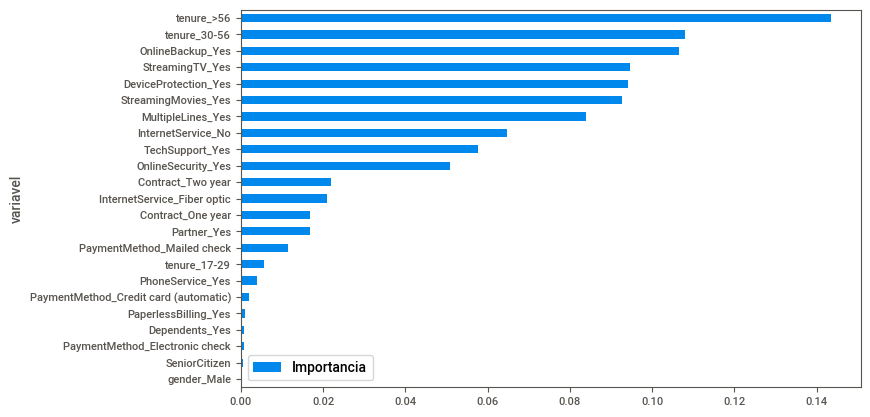

In [90]:
variaveis = pd.DataFrame()
variaveis["variavel"] = x.columns
variaveis["Importancia"] = modelo.feature_importances_
variaveis.sort_values(by = "Importancia", ascending = True, inplace = True)
variaveis.set_index("variavel", inplace = True)
variaveis.plot(kind = "barh", figsize = (8,5))
dados_treino.head()
# gender_Male,Senior_citizen,dependents,phone_service_yes -> no service sao os problemas

**Análise**

Devemos cortar algumas variáveis menos influentes para otimizar o modelo. 
Devemos nos atentar que cortar tenure_17-29 remete a transformar a variavel <17 e tenure_17-29 como uma só, então ao cortar algo devemos estar atentos ao que cortamos junto com ela.

Alguns cortes possíveis são de gender_Male, Dependents_Yes, SeniorCitizen, PaperlessBilling_Yes, PaymentMethod (todas) e Contract (todas)

Cortar phone_Service_Yes remete a remover o no phone service em multiple lines e não é algo apropriado.

In [91]:
x1 = dados_treino.drop(["gender_Male","Dependents_Yes","SeniorCitizen","Cliente"], axis = 1)
x2 = dados_treino.drop(["gender_Male","Dependents_Yes","SeniorCitizen","PaperlessBilling_Yes","Cliente"], axis = 1)
x33 = dados_treino.drop(["gender_Male","Dependents_Yes","SeniorCitizen","PaperlessBilling_Yes","PaymentMethod_Credit card (automatic)", "PaymentMethod_Electronic check", "PaymentMethod_Mailed check","Cliente"], axis = 1)
x4 =  dados_treino.drop(["gender_Male","Dependents_Yes","SeniorCitizen","PaperlessBilling_Yes","PaymentMethod_Credit card (automatic)", "PaymentMethod_Electronic check", "PaymentMethod_Mailed check", "Contract_One year", "Contract_Two year","Cliente"], axis = 1)
x5 =  dados_treino.drop(["gender_Male","Dependents_Yes","SeniorCitizen","PaperlessBilling_Yes", "Contract_One year", "Contract_Two year","Cliente"], axis = 1)
display(x5)
display(x4)

,Partner_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_17-29,tenure_30-56,tenure_>56
0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
1,1,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,1
3,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,1,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0
2496,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0,0
2497,1,1,1,1,0,1,0,0,0,1,1,0,1,0,0,1,0
2498,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


,Partner_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,tenure_17-29,tenure_30-56,tenure_>56
0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
1,1,1,1,0,0,1,1,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,1,1,1,1,0,0,1
3,0,1,1,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,1,0,0,0,0,1,0,1,1,1,0,0,0
2496,0,1,0,1,0,0,0,0,0,1,1,1,0,0
2497,1,1,1,1,0,1,0,0,0,1,1,0,1,0
2498,0,1,0,0,0,0,0,0,0,0,0,1,0,0


**Seleção Automatica**
Outra forma de seleção porém menos analítica é selecionar as variáveis mais importantes em ordem decresecente

In [92]:
from sklearn.feature_selection import SelectFromModel


seletor = SelectFromModel(modelo, prefit = True, max_features = 3, threshold = -np.inf)
x3 = seletor.transform(x)
print(x3.shape)

seletor = SelectFromModel(modelo, prefit = True, max_features = 7, threshold = -np.inf)
x7 = seletor.transform(x)
print(x7.shape)

seletor = SelectFromModel(modelo, prefit = True, max_features = 13, threshold = -np.inf)
x13 = seletor.transform(x)
print(x13.shape)

(2500, 3)
(2500, 7)
(2500, 13)


In [93]:
x = dados_treino.drop("Cliente", axis = 1)
y = dados_treino["Cliente"]

reglog = LogisticRegression()
grad = GradientBoostingClassifier()
sgd = SGDClassifier()
arvore_5 = DecisionTreeClassifier(max_depth = 5)

modelos_3_mais = [("Reglog",reglog),("GradBosst", grad),
                 ("arvore5",arvore_5)]

modelos_2_mais_ = [("Reglog",reglog),("GradBosst", grad)]

modelos_4_mais = [("Reglog",reglog),("GradBosst", grad),
                 ("arvore5",arvore_5), ("SGD"),sgd]

modelo_3s = VotingClassifier(modelos_3_mais, voting = "soft")  #MELHOR
modelo_2s = VotingClassifier(modelos_2_mais_, voting = "soft")  #MELHOR
modelo_3h = VotingClassifier(modelos_3_mais, voting = "hard")  #MELHOR

print("=="*30)
#resp_2s = Hold_out_repetido(modelo_2s)
#resp_3s = Hold_out_repetido(modelo_3s)
#resp_4h = Hold_out_repetido(modelo_4h)
#resp_3h = Hold_out_repetido(modelo_3h)

# Bagging
from sklearn.ensemble import BaggingClassifier


modelo_base_3_ = modelo_3s
modelo_base_2_ = modelo_2s
modelo_base_3_h = modelo_3h

#modelo_base = KNeighborsClassifier(n_neighbors = 17)
#modelo_base = DecisionTreeClassifier(max_depth = 3)

#n_estimator é quantas vezes farei a replica bootstrap e vai aplicar no modelo e combinar todos os modelos
modelo_3 = BaggingClassifier(n_estimators = 50, base_estimator = modelo_base_3_) # MELHOR
modelo_2 = BaggingClassifier(n_estimators = 50, base_estimator = modelo_base_2_) # MELHOR
modelo_3hard = BaggingClassifier(n_estimators = 50, base_estimator = modelo_base_3_h) # MELHOR


print("modelo_2s")
resp = Hold_out_repetido(modelo_2s)
display(resp)
print("="*50)
print("modelo_3s")
resp = Hold_out_repetido(modelo_3s)
display(resp)
print("="*50)
print("modelo_3h")
resp = Hold_out_repetido(modelo_3h)
display(resp)
print("="*50)
print("modelo_3")
resp = Hold_out_repetido(modelo_3)
display(resp)
print("="*50)
print("modelo_2")
resp = Hold_out_repetido(modelo_2)
display(resp)
print("="*50)
print("modelo_3hard")
resp = Hold_out_repetido(modelo_3hard)
display(resp)

modelo_2s


f1-score TREINO             0.980879
f1-score TESTE              0.969321
Accuracia TREINO            0.981829
Accuracia TESTE             0.971733
Balanced Accuracy TREINO    0.981833
Balanced Accuracy TESTE     0.971678
Precisão TREINO             0.979814
Precisão TESTE              0.968682
Sensibilidade TREINO        0.981949
Sensibilidade TESTE         0.970039
dtype: float64

modelo_3s


f1-score TREINO             0.977503
f1-score TESTE              0.966670
Accuracia TREINO            0.978743
Accuracia TESTE             0.968533
Balanced Accuracy TREINO    0.978786
Balanced Accuracy TESTE     0.969035
Precisão TREINO             0.975163
Precisão TESTE              0.959491
Sensibilidade TREINO        0.979865
Sensibilidade TESTE         0.974067
dtype: float64

modelo_3h


f1-score TREINO             0.979287
f1-score TESTE              0.969917
Accuracia TREINO            0.980343
Accuracia TESTE             0.972267
Balanced Accuracy TREINO    0.980345
Balanced Accuracy TESTE     0.971854
Precisão TREINO             0.978338
Precisão TESTE              0.972794
Sensibilidade TREINO        0.980241
Sensibilidade TESTE         0.967075
dtype: float64

modelo_3


f1-score TREINO             0.977813
f1-score TESTE              0.968097
Accuracia TREINO            0.979086
Accuracia TESTE             0.969867
Balanced Accuracy TREINO    0.979103
Balanced Accuracy TESTE     0.969809
Precisão TREINO             0.976055
Precisão TESTE              0.966299
Sensibilidade TREINO        0.979583
Sensibilidade TESTE         0.969964
dtype: float64

modelo_2


f1-score TREINO             0.978062
f1-score TESTE              0.971584
Accuracia TREINO            0.979314
Accuracia TESTE             0.973333
Balanced Accuracy TREINO    0.979242
Balanced Accuracy TESTE     0.973508
Precisão TREINO             0.978181
Precisão TESTE              0.967853
Sensibilidade TREINO        0.977946
Sensibilidade TESTE         0.975512
dtype: float64

modelo_3hard


f1-score TREINO             0.978592
f1-score TESTE              0.968938
Accuracia TREINO            0.979771
Accuracia TESTE             0.970933
Balanced Accuracy TREINO    0.979696
Balanced Accuracy TESTE     0.971142
Precisão TREINO             0.978944
Precisão TESTE              0.965466
Sensibilidade TREINO        0.978244
Sensibilidade TESTE         0.972619
dtype: float64

**Função para testar varios modelos e avaliar por meio de HOLDOUT REPETIDO**

In [94]:
def MachineLearning(k = dados_treino.drop("Cliente", axis = 1)):

    gbc_2 = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 200)
    gbc_3 = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 200, max_depth = 4)
    
    modelos = [LogisticRegression(),
              #KNeighborsClassifier(n_neighbors = 1),
              #KNeighborsClassifier(n_neighbors = 3), 
              #KNeighborsClassifier(n_neighbors = 5),
              #KNeighborsClassifier(n_neighbors = 7),
              #KNeighborsClassifier(n_neighbors = 9),
              #KNeighborsClassifier(n_neighbors = 11),
              #KNeighborsClassifier(n_neighbors = 13), 
              #KNeighborsClassifier(n_neighbors = 15),
              #KNeighborsClassifier(n_neighbors = 17),
              #KNeighborsClassifier(n_neighbors = 19), 
              #KNeighborsClassifier(n_neighbors = 25),
              #KNeighborsClassifier(n_neighbors = 35),
              #KNeighborsClassifier(n_neighbors = 45),
              #DecisionTreeClassifier(max_depth = 1),
              #DecisionTreeClassifier(max_depth = 2),
              #DecisionTreeClassifier(max_depth = 3),
              #DecisionTreeClassifier(max_depth = 4),
              #DecisionTreeClassifier(max_depth = 5),
              #DecisionTreeClassifier(max_depth = 6),
              #DecisionTreeClassifier(max_depth = 7),
              #DecisionTreeClassifier(max_depth = 8),
              #DecisionTreeClassifier(max_depth = 9),
              #RandomForestClassifier(n_estimators = 200, max_depth = 1),
              #RandomForestClassifier(n_estimators = 200, max_depth = 2),
              #RandomForestClassifier(n_estimators = 200, max_depth = 3),
              #RandomForestClassifier(n_estimators = 200, max_depth = 4),
              #RandomForestClassifier(n_estimators = 200, max_depth = 5),
              #RandomForestClassifier(n_estimators = 200, max_depth = 6),
              #RandomForestClassifier(n_estimators = 200, max_depth = 7),
              #RandomForestClassifier(n_estimators = 200, max_depth = 8),
              #RandomForestClassifier(n_estimators = 200, max_depth = 9),
              #RandomForestClassifier(n_estimators = 200, max_depth = 10),
              modelo_3_mais_hard, modelo_2_mais_hard ,modelo_3_mais_soft,
              modelo_2_mais_soft, SGDClassifier(), GradientBoostingClassifier(),gbc_2, gbc_3,
              LGBMClassifier(), LGBMClassifier(n_estimators = 200), modelo_bag_2, modelo_bag_3,
              modelo_2s,modelo_3s,
              modelo_3h,modelo_3,
              modelo_2,modelo_3hard]

    nomes = ["Regressão Linear",
            #"KNN - K = 1", #overfitting
            #"KNN - K = 3", #overfitting
            #"KNN - K = 5", #overfitting
            #"KNN - K = 7", #overfitting
            #"KNN - K = 9", #overfitting
            #"KNN - K = 11", #overfitting
            #"KNN - K = 13", #overfitting
            #"KNN - K = 15", # ruim
            #"KNN - K = 17", # ruim
            #"KNN - K = 19", # ruim
            #"KNN - K = 25", # ruim
            #"KNN - K = 35", # ruim
            #"KNN - K = 45", # ruim
            #"Árvore - Profundidade = 1", #ruim
            #"Árvore - Profundidade = 2", #ruim
           # "Árvore - Profundidade = 3",
           # "Árvore - Profundidade = 4",
           # "Árvore - Profundidade = 5",
           # "Árvore - Profundidade = 6",
           # "Árvore - Profundidade = 7",#overfitting
           # "Árvore - Profundidade = 8",#overfitting
           # "Árvore - Profundidade = 9",
            #"RF1","RF2","RF3","RF4","RF5",
            # "RF6","RF7","RF8","RF9","RF10",
             "3H","2H","3S","2S",
             "SGD", "GradBost","GradBost(l_r = 0.1, n=200)",
            "GradBost(l_r = 0.1, n=200, mx=4)","LGBM", "LGBM(n=200)",
            "Bag2", "Bag3", "2S_GD_RL","3S_GD_RL_ARV",
            "3H_GD_RL_AR","3S_Bag2",
            "2S_Bag2","3H_Bag2"] #overfitting

    treinos = []
    testes = []

    for modelo in modelos:
        resultados = Hold_out_repetido(modelo, x = k)
        treinos.append(resultados[0])
        testes.append(resultados[1])
        print(f"Rodou o modelo {modelo}")

    aux = {"F_1_SCORE Treino": treinos, "F_1_SCORE Teste": testes}
    resultados = pd.DataFrame(aux, index = nomes)
    return resultados.sort_values(by = "F_1_SCORE Teste", ascending = False)

## TESTES DE MODELOS E TRATAMENTO DA VARIAVEL ENTRADA

In [95]:
MachineLearning(k = x7)

Rodou o modelo LogisticRegression()
Rodou o modelo VotingClassifier(estimators=[('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Arvore_4', DecisionTreeClassifier(max_depth=4)),
                             ('Reg Log', LogisticRegression())])
Rodou o modelo VotingClassifier(estimators=[('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Reg Log', LogisticRegression())])
Rodou o modelo VotingClassifier(estimators=[('Arvore_4', DecisionTreeClassifier(max_depth=4)),
                             ('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Reg Log', LogisticRegression())],
                 voting='soft')
Rodou o modelo VotingClassifier(estimators=[('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Reg Log', LogisticRegression())],
                 voting='soft')
Rodou o modelo SGDClassifier()
Rodou o modelo GradientBoostingClassifier()
Rodou o modelo GradientBo

,F_1_SCORE Treino,F_1_SCORE Teste
Bag3,0.892009,0.902562
2S,0.894054,0.899920
"GradBost(l_r = 0.1, n=200)",0.904588,0.898246
Regressão Linear,0.890324,0.897606
LGBM(n=200),0.904121,0.896730
3S,0.892127,0.896700
LGBM,0.906004,0.896317
"GradBost(l_r = 0.1, n=200, mx=4)",0.905247,0.893377
3S_Bag2,0.900598,0.892464
GradBost,0.903141,0.892450


In [96]:
MachineLearning(k = x3)

Rodou o modelo LogisticRegression()
Rodou o modelo VotingClassifier(estimators=[('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Arvore_4', DecisionTreeClassifier(max_depth=4)),
                             ('Reg Log', LogisticRegression())])
Rodou o modelo VotingClassifier(estimators=[('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Reg Log', LogisticRegression())])
Rodou o modelo VotingClassifier(estimators=[('Arvore_4', DecisionTreeClassifier(max_depth=4)),
                             ('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Reg Log', LogisticRegression())],
                 voting='soft')
Rodou o modelo VotingClassifier(estimators=[('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Reg Log', LogisticRegression())],
                 voting='soft')
Rodou o modelo SGDClassifier()
Rodou o modelo GradientBoostingClassifier()
Rodou o modelo GradientBo

,F_1_SCORE Treino,F_1_SCORE Teste
3S_GD_RL_ARV,0.831686,0.846517
2H,0.832055,0.845106
2S_Bag2,0.832312,0.844480
3H_Bag2,0.834518,0.839368
SGD,0.834611,0.839366
2S_GD_RL,0.834766,0.839338
Bag2,0.835350,0.837782
3S,0.835383,0.837674
3H,0.835845,0.836133
3S_Bag2,0.836613,0.834519


In [97]:
MachineLearning(k = x13)

Rodou o modelo LogisticRegression()
Rodou o modelo VotingClassifier(estimators=[('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Arvore_4', DecisionTreeClassifier(max_depth=4)),
                             ('Reg Log', LogisticRegression())])
Rodou o modelo VotingClassifier(estimators=[('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Reg Log', LogisticRegression())])
Rodou o modelo VotingClassifier(estimators=[('Arvore_4', DecisionTreeClassifier(max_depth=4)),
                             ('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Reg Log', LogisticRegression())],
                 voting='soft')
Rodou o modelo VotingClassifier(estimators=[('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Reg Log', LogisticRegression())],
                 voting='soft')
Rodou o modelo SGDClassifier()
Rodou o modelo GradientBoostingClassifier()
Rodou o modelo GradientBo

,F_1_SCORE Treino,F_1_SCORE Teste
3S_GD_RL_ARV,0.928207,0.932055
3H_GD_RL_AR,0.931027,0.925885
3S,0.919028,0.925444
LGBM(n=200),0.954848,0.922966
2S_Bag2,0.928169,0.921554
2H,0.920314,0.921239
GradBost,0.936827,0.920721
Bag2,0.928215,0.920489
3S_Bag2,0.928866,0.920198
3H_Bag2,0.932059,0.919582


In [98]:
MachineLearning(k = x1)

Rodou o modelo LogisticRegression()
Rodou o modelo VotingClassifier(estimators=[('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Arvore_4', DecisionTreeClassifier(max_depth=4)),
                             ('Reg Log', LogisticRegression())])
Rodou o modelo VotingClassifier(estimators=[('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Reg Log', LogisticRegression())])
Rodou o modelo VotingClassifier(estimators=[('Arvore_4', DecisionTreeClassifier(max_depth=4)),
                             ('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Reg Log', LogisticRegression())],
                 voting='soft')
Rodou o modelo VotingClassifier(estimators=[('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Reg Log', LogisticRegression())],
                 voting='soft')
Rodou o modelo SGDClassifier()
Rodou o modelo GradientBoostingClassifier()
Rodou o modelo GradientBo

,F_1_SCORE Treino,F_1_SCORE Teste
3S_Bag2,0.976179,0.972796
3S_GD_RL_ARV,0.975328,0.972766
GradBost,0.979979,0.971739
Bag3,0.971467,0.971455
Bag2,0.975858,0.971451
3H_GD_RL_AR,0.978155,0.970962
3H_Bag2,0.979527,0.969353
2S_Bag2,0.979977,0.968831
Regressão Linear,0.968696,0.967273
2S_GD_RL,0.981164,0.965922


In [99]:
MachineLearning(k = x2)

Rodou o modelo LogisticRegression()
Rodou o modelo VotingClassifier(estimators=[('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Arvore_4', DecisionTreeClassifier(max_depth=4)),
                             ('Reg Log', LogisticRegression())])
Rodou o modelo VotingClassifier(estimators=[('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Reg Log', LogisticRegression())])
Rodou o modelo VotingClassifier(estimators=[('Arvore_4', DecisionTreeClassifier(max_depth=4)),
                             ('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Reg Log', LogisticRegression())],
                 voting='soft')
Rodou o modelo VotingClassifier(estimators=[('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Reg Log', LogisticRegression())],
                 voting='soft')
Rodou o modelo SGDClassifier()
Rodou o modelo GradientBoostingClassifier()
Rodou o modelo GradientBo

,F_1_SCORE Treino,F_1_SCORE Teste
Bag2,0.973342,0.975990
3S_Bag2,0.977481,0.969776
Bag3,0.968706,0.969139
3H_Bag2,0.977690,0.968248
3H_GD_RL_AR,0.978098,0.968129
2S_Bag2,0.978135,0.967938
2S_GD_RL,0.980640,0.967790
GradBost,0.979288,0.966788
2S,0.971838,0.966525
3S,0.966592,0.965911


In [100]:
MachineLearning(k = x33)

Rodou o modelo LogisticRegression()
Rodou o modelo VotingClassifier(estimators=[('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Arvore_4', DecisionTreeClassifier(max_depth=4)),
                             ('Reg Log', LogisticRegression())])
Rodou o modelo VotingClassifier(estimators=[('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Reg Log', LogisticRegression())])
Rodou o modelo VotingClassifier(estimators=[('Arvore_4', DecisionTreeClassifier(max_depth=4)),
                             ('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Reg Log', LogisticRegression())],
                 voting='soft')
Rodou o modelo VotingClassifier(estimators=[('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Reg Log', LogisticRegression())],
                 voting='soft')
Rodou o modelo SGDClassifier()
Rodou o modelo GradientBoostingClassifier()
Rodou o modelo GradientBo

,F_1_SCORE Treino,F_1_SCORE Teste
3S_GD_RL_ARV,0.974155,0.971421
GradBost,0.977410,0.970469
2S_GD_RL,0.975691,0.970458
2S_Bag2,0.975039,0.969559
3S_Bag2,0.975625,0.968405
"GradBost(l_r = 0.1, n=200)",0.981733,0.968066
3H_Bag2,0.976140,0.967601
3H_GD_RL_AR,0.976097,0.966909
Bag2,0.975766,0.965648
Bag3,0.971736,0.965454


In [101]:
MachineLearning(k = x4)

Rodou o modelo LogisticRegression()
Rodou o modelo VotingClassifier(estimators=[('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Arvore_4', DecisionTreeClassifier(max_depth=4)),
                             ('Reg Log', LogisticRegression())])
Rodou o modelo VotingClassifier(estimators=[('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Reg Log', LogisticRegression())])
Rodou o modelo VotingClassifier(estimators=[('Arvore_4', DecisionTreeClassifier(max_depth=4)),
                             ('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Reg Log', LogisticRegression())],
                 voting='soft')
Rodou o modelo VotingClassifier(estimators=[('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Reg Log', LogisticRegression())],
                 voting='soft')
Rodou o modelo SGDClassifier()
Rodou o modelo GradientBoostingClassifier()
Rodou o modelo GradientBo

,F_1_SCORE Treino,F_1_SCORE Teste
3S_Bag2,0.974221,0.971904
3S_GD_RL_ARV,0.975526,0.971756
2S_Bag2,0.973557,0.971457
3H_Bag2,0.975319,0.970048
Bag2,0.974589,0.969484
2S_GD_RL,0.976856,0.969106
3H_GD_RL_AR,0.977581,0.968653
Bag3,0.971351,0.968413
"GradBost(l_r = 0.1, n=200)",0.981847,0.967235
Regressão Linear,0.969148,0.966455


In [102]:
MachineLearning(k = x5)

Rodou o modelo LogisticRegression()
Rodou o modelo VotingClassifier(estimators=[('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Arvore_4', DecisionTreeClassifier(max_depth=4)),
                             ('Reg Log', LogisticRegression())])
Rodou o modelo VotingClassifier(estimators=[('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Reg Log', LogisticRegression())])
Rodou o modelo VotingClassifier(estimators=[('Arvore_4', DecisionTreeClassifier(max_depth=4)),
                             ('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Reg Log', LogisticRegression())],
                 voting='soft')
Rodou o modelo VotingClassifier(estimators=[('Arvore_5', DecisionTreeClassifier(max_depth=5)),
                             ('Reg Log', LogisticRegression())],
                 voting='soft')
Rodou o modelo SGDClassifier()
Rodou o modelo GradientBoostingClassifier()
Rodou o modelo GradientBo

,F_1_SCORE Treino,F_1_SCORE Teste
3H_Bag2,0.975451,0.975063
GradBost,0.978030,0.972251
3H_GD_RL_AR,0.976830,0.971471
Bag2,0.975000,0.971423
2S_Bag2,0.977328,0.971136
Regressão Linear,0.969505,0.970491
Bag3,0.971296,0.970464
2S_GD_RL,0.979258,0.969061
3S_GD_RL_ARV,0.975874,0.969004
3S_Bag2,0.978151,0.968466


In [103]:
# X4 escolhido
# modelo_3 escolhido
dados_treino

,SeniorCitizen,Cliente,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_17-29,tenure_30-56,tenure_>56
0,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,1,1,0,0
1,0,1,0,1,1,1,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1
2,0,1,0,1,1,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
3,0,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2496,0,1,1,0,0,1,0,1,0,0,...,1,0,0,1,0,1,0,1,0,0
2497,0,1,1,1,0,1,1,1,0,1,...,1,1,0,1,0,1,0,0,1,0
2498,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [104]:
dados_teste

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_17-29,tenure_30-56,tenure_>56
0,0,0,1,1,1,0,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
1,0,0,0,0,1,0,0,0,1,1,...,0,0,0,1,0,0,1,1,0,0
2,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,1,0,1,0,...,1,0,1,1,1,0,0,0,1,0
4,0,1,1,0,1,0,1,0,0,1,...,1,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,0,1,1,1,1,0,0,1,1,...,1,0,1,0,1,0,0,0,0,1
2496,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2497,1,1,0,0,1,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0
2498,0,1,0,0,1,0,0,1,0,0,...,0,0,1,1,1,0,0,0,0,1


In [105]:
x4

,Partner_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,tenure_17-29,tenure_30-56,tenure_>56
0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
1,1,1,1,0,0,1,1,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,1,1,1,1,0,0,1
3,0,1,1,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0,1,0,0,0,0,1,0,1,1,1,0,0,0
2496,0,1,0,1,0,0,0,0,0,1,1,1,0,0
2497,1,1,1,1,0,1,0,0,0,1,1,0,1,0
2498,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [106]:
x_treino = x4
y_treino = dados_treino["Cliente"]
x_teste =  dados_teste.drop(["gender_Male","Dependents_Yes","SeniorCitizen","PaperlessBilling_Yes","PaymentMethod_Credit card (automatic)", "PaymentMethod_Electronic check", "PaymentMethod_Mailed check", "Contract_One year", "Contract_Two year"], axis = 1)
modelo_final = modelo_3.fit(x_treino,y_treino)

In [107]:
# Salvando Modelo
import pickle
filename = 'modelo_Classificacao.sav'
pickle.dump(modelo_final, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
#save_model(modelo_final, "modelo_final_Class")
subm = modelo_final.predict(x_teste)
subm

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

Modelo ta salvo e é igual o final.

In [108]:
subm_2 = loaded_model.predict(x_teste)
subm_2 == subm

array([ True,  True,  True, ...,  True,  True,  True])

In [109]:
subm
sub = pd.DataFrame()
sub["Cliente"] = subm
sub
sub.to_csv("Submissao_100.csv", index = False)

## PARA OUTROS DADOS: DEPLOY

In [110]:
def Previsao_novos_dados(x):
    import pandas as pd
    import pickle
    
    filename = 'modelo_Classificacao.sav'
    
    modelo = pickle.load(open(filename, 'rb'))
    
    x.loc[x["InternetService"]=="No",["InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]] = "No"
    x.loc[x["PhoneService"]=="No",["PhoneService", "MultipleLines"]] = "No"
    x = pd.get_dummies(data = x, drop_first = True, columns = x.drop(["tenure", "SeniorCitizen"], axis = 1).columns)
    x.loc[:,"tenure"] = x["tenure"].apply(classificando)
    x = pd.get_dummies(data = x, drop_first = True, columns = ["tenure"])
    x = x.drop(["gender_Male","Dependents_Yes","SeniorCitizen","PaperlessBilling_Yes","PaymentMethod_Credit card (automatic)", "PaymentMethod_Electronic check", "PaymentMethod_Mailed check", "Contract_One year", "Contract_Two year"], axis = 1)
    
    #display(x.head(1))

    pred = modelo.predict(x)
    
    return pred

In [111]:
dados = pd.read_csv("teste.csv")
pred = Previsao_novos_dados(dados)

In [112]:
pred = pd.Series(pred)

In [113]:
pred.map({1:"Premium",0:"Normal"})

0        Normal
1        Normal
2        Normal
3       Premium
4       Premium
         ...   
2495    Premium
2496     Normal
2497     Normal
2498     Normal
2499    Premium
Length: 2500, dtype: object

**Algumas Conclusões**

O modelo construído e analisado nos dados que possuímos a variável resposta teve desempenho muito bom e como foi analisado pelo HoldOut o modelo não aparenta estar com overfitting, desta forma ele é um bom modelo para prever se um cliente é premium ou normal.

A utilidade disso para o negócio é desenvolver planos que favoreçam a fidelização do cliente e que ele se torne Premium.

Desta forma é mais proveitoso oferecer planos que garantam o cliente em lista premium no menor tenure possível, por exemplo.

# Próximos Passos

O modelo se mostrou muito bom e abordou muito conteúdo na construção dele, aqui foram desenvolvidas e explicadas com certos detalhes, diversas técnicas de modelamento de Machine Learning.

Recomenda-se como próximos passos a leitura sobre os modelos utilizados para quem desconhece do funcionamento dos mesmos e como são feitas as análises Back-End.

O treino da construção utilizando a variável tenure como numérica; treino não cortando as variáveis que estavam com colinearidade e outras possíveis categorizações.

Além disso, recomenda-se estudo sobre tunagem de hiperparâmetros, assunto não abordado aqui para não aumentar mais ainda o grau de complexidade do problema proposto (já foi muito conteudista até aqui).



# Obrigado!

**Agradeço por ter lido até aqui, caso tenha alguma dúvida, sugestão ou outros tópicos para serem abordados, estou à disposição.**